# CCA: Canonical Correlation Analysis

In [284]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA

In [285]:
#load the SST anomalies (processed data from last tutorial)
calcofi_data = pd.read_csv('Datasets/calcofi_combined.csv')
calcofi_data = calcofi_data.dropna(subset=['T_degC'])

# Calculate the percentage of NaN values per column, formatted to 2 decimals and in percentage format
na_percentage = (calcofi_data.isna().mean() * 100).round(2)

# Display the results in percentage format
na_percentage = na_percentage.apply(lambda x: f"{x:.2f}%")

# Print the results
print('Missing Values per Column (in %)')
print(na_percentage)

Missing Values per Column (in %)
Cst_Cnt         0.00%
Sta_ID          0.00%
ChlorA          0.00%
Phaeop          0.00%
T_degC          0.00%
Salnty          0.56%
O2ml_L          0.61%
PO4uM           4.39%
SiO3uM          3.95%
NO3uM           4.06%
Depthm          0.00%
Date            0.00%
Year            0.00%
Month           0.00%
Julian_Day      0.00%
Lat_Dec         0.00%
Lon_Dec         0.00%
Julian_Date     0.00%
Wind_Spd        2.24%
Wave_Ht        43.42%
Dry_T           2.14%
Wave_Prd       44.11%
Barometer       2.18%
dtype: object


In [286]:
# Extract characters from position 7 to 10 of the Sta_ID column
calcofi_data['Sta_ID_prefix'] = calcofi_data['Sta_ID'].astype(str).str[6:9]

# Count unique values in the extracted prefixes
unique_sta_id_prefix_count = calcofi_data['Sta_ID_prefix'].nunique()

# Print the count of unique values based on the extracted digits
print("Count of unique Station values based on the extracted 3 digits (positions 7 to 10):", unique_sta_id_prefix_count)

Count of unique Station values based on the extracted 3 digits (positions 7 to 10): 103


In [287]:
# Create 3 datasets from calcofi_data

# Create the cal_data dataset
cal_data = calcofi_data[['Date', 'Sta_ID_prefix', 'ChlorA']]

# Create the temp_data dataset
temp_data = calcofi_data[['Date', 'Sta_ID_prefix', 'T_degC']]

# Create the depth_data dataset
depth_data = calcofi_data[['Date', 'Sta_ID_prefix', 'Depthm']]

# Create the depth_data dataset
nutrient = 'O2ml_L'
nutrient_data = calcofi_data[['Date', 'Sta_ID_prefix', nutrient]]


In [288]:
cal_data.head()

Date Sta_ID_prefix    ChlorA
0  1973-03-08           035  0.650000
1  1973-03-10           008  2.483333
2  1973-03-10           008  0.240000
3  1973-03-11           010  2.425000
4  1973-03-12           009  5.540909

/var/folders/pp/y5y2qg9j3hj_2v8_lfh8f_n40000gn/T/ipykernel_46992/2426582485.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cal_data['Date'] = pd.to_datetime(cal_data['Date'], errors='coerce')


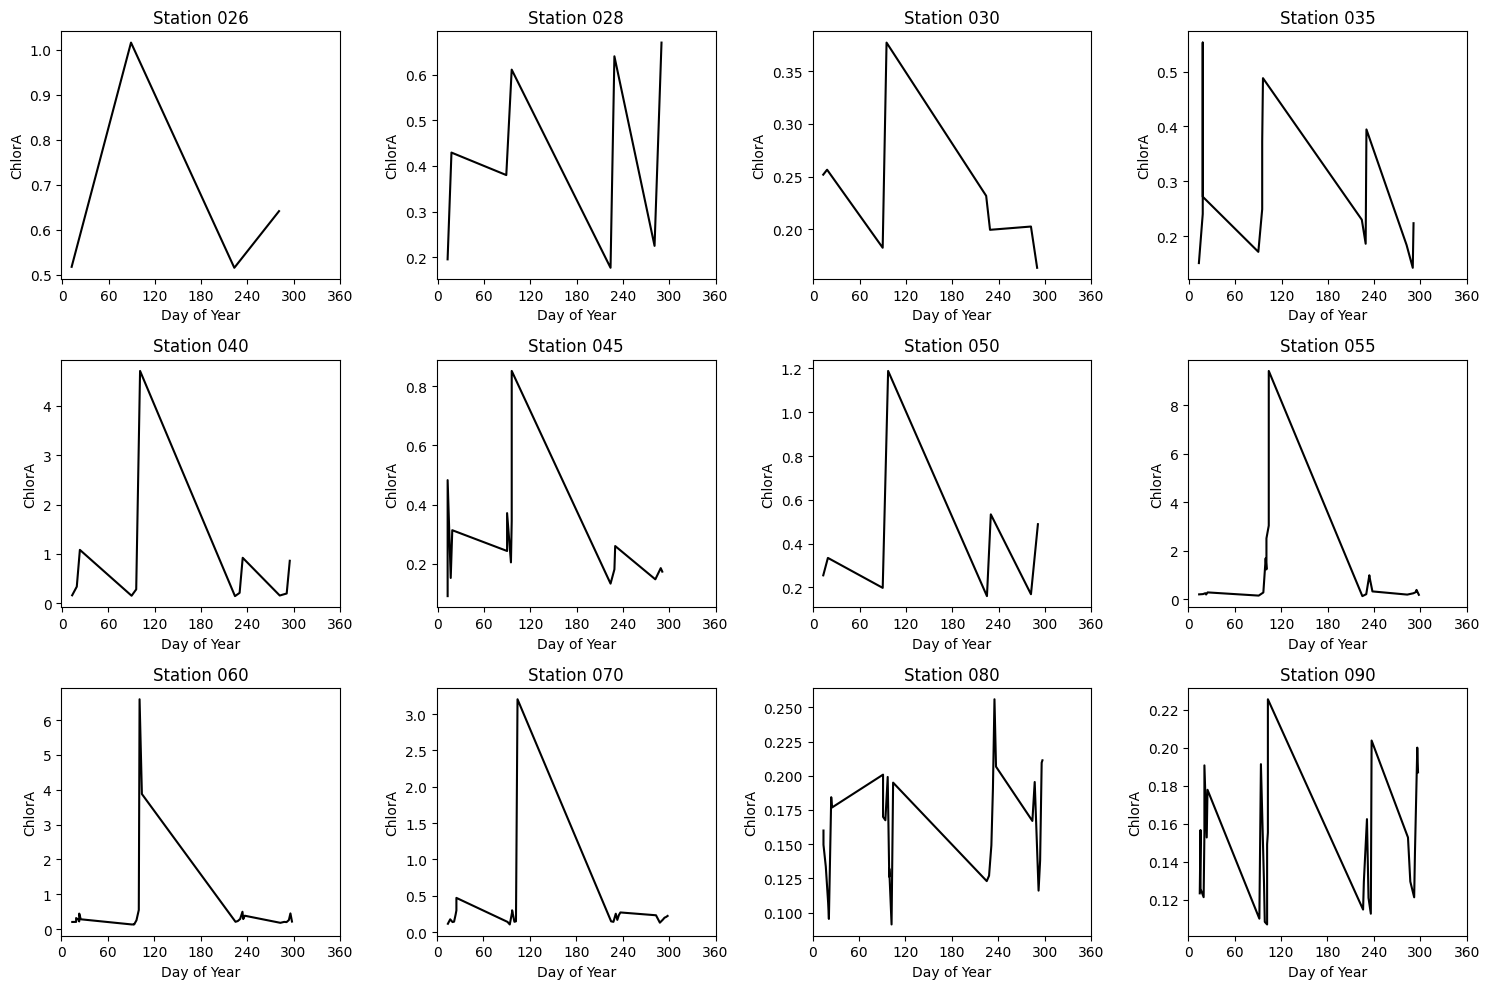

In [289]:
# Ensure the Date column is properly converted to datetime format
cal_data['Date'] = pd.to_datetime(cal_data['Date'], errors='coerce')

# Check for any non-datetime values that were converted to NaT
if cal_data['Date'].isna().any():
    print("Warning: There are invalid dates in the Date column. They have been converted to NaT.")

# Filter cal_data for entries from the year 1993
cal_data_1993 = cal_data[cal_data['Date'].dt.year == 1993]

# Select the first 12 unique stations that have data in 1993
first_12_stations = cal_data_1993['Sta_ID_prefix'].unique()[:12]
data_first_12_stations = cal_data_1993[cal_data_1993['Sta_ID_prefix'].isin(first_12_stations)]

# Create the plot
fig, ax = plt.subplots(3, 4, figsize=(15, 10))
ax = ax.flatten()

# Plot ChlorA data for each of the first 12 stations
for i, station in enumerate(first_12_stations):
    station_data = data_first_12_stations[data_first_12_stations['Sta_ID_prefix'] == station]
    
    # Verify there is data to plot for the station
    if not station_data.empty:
        # Use .assign() to avoid the warning
        station_data = station_data.assign(DayOfYear=station_data['Date'].dt.dayofyear)
        ax[i].plot(station_data['DayOfYear'], station_data['ChlorA'], c="k")
        ax[i].set_title(f"Station {station}")
        ax[i].set_xlabel("Day of Year")
        ax[i].set_ylabel("ChlorA")
        ax[i].set_xticks(range(0, 366, 60))  # Set intervals for every 60 days for longer spacing
    
plt.tight_layout()
plt.show()

/var/folders/pp/y5y2qg9j3hj_2v8_lfh8f_n40000gn/T/ipykernel_46992/3709231989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cal_data['Date'] = pd.to_datetime(cal_data['Date'], errors='coerce')
/var/folders/pp/y5y2qg9j3hj_2v8_lfh8f_n40000gn/T/ipykernel_46992/3709231989.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cal_data['Year'] = cal_data['Date'].dt.year


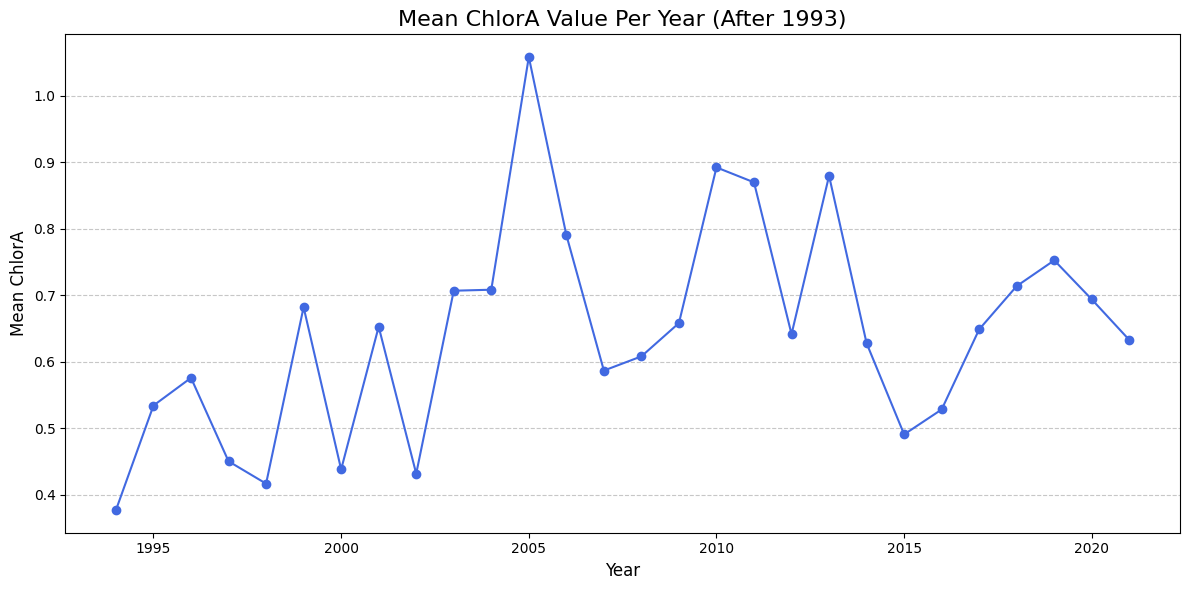

In [291]:
# Ensure the Date column is properly converted to datetime format
cal_data['Date'] = pd.to_datetime(cal_data['Date'], errors='coerce')

# Check for any non-datetime values that were converted to NaT
if cal_data['Date'].isna().any():
    print("Warning: There are invalid dates in the Date column. They have been converted to NaT.")

# Extract the year from the Date column
cal_data['Year'] = cal_data['Date'].dt.year

# Filter for years after 1993
cal_data_after_1993 = cal_data[cal_data['Year'] > 1993]

# Compute the mean ChlorA value per year
chlorA_mean_per_year = cal_data_after_1993.groupby('Year')['ChlorA'].mean().reset_index()

# Plot the mean ChlorA per year
plt.figure(figsize=(12, 6))
plt.plot(chlorA_mean_per_year['Year'], chlorA_mean_per_year['ChlorA'], marker='o', linestyle='-', color='#4169E1')
plt.title('Mean ChlorA Value Per Year (After 1993)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mean ChlorA', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

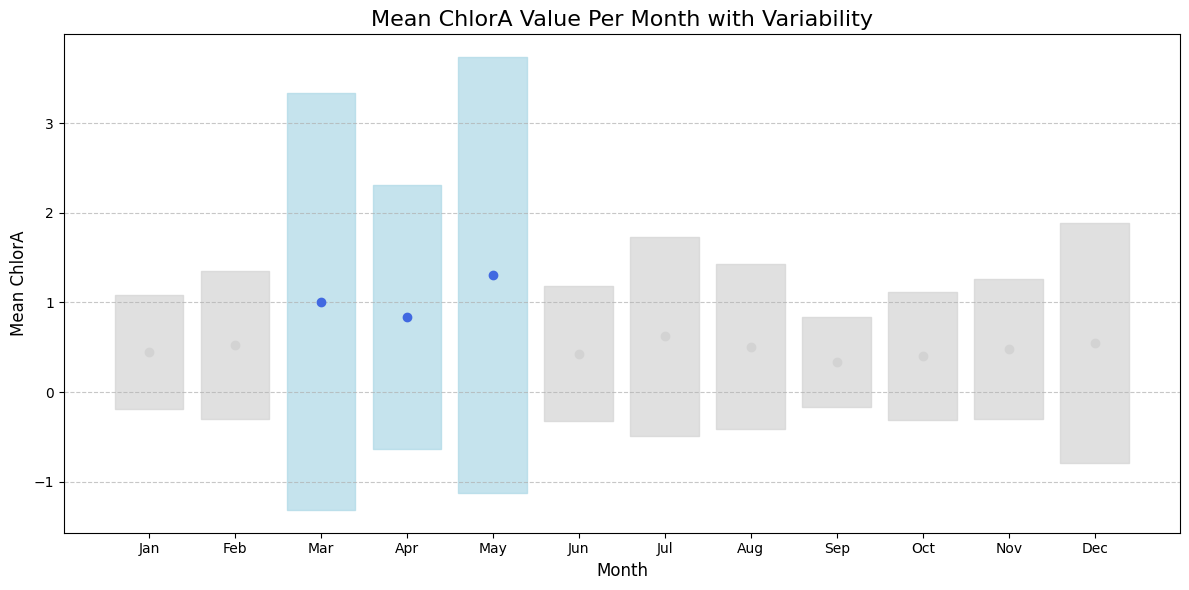

In [297]:
# Compute the mean and standard deviation of ChlorA per month
chlorA_stats_per_month = cal_data.groupby('Month')['ChlorA'].agg(['mean', 'std']).reset_index()

# Define colors: Blue for March, April, and May; Gray for others
line_colors = ['#4169E1' if month in [3, 4, 5] else 'lightgray' for month in chlorA_stats_per_month['Month']]
fill_colors = ['#ADD8E6' if month in [3, 4, 5] else '#D3D3D3' for month in chlorA_stats_per_month['Month']]

# Plot the mean ChlorA per month with a distribution band
plt.figure(figsize=(12, 6))

for i, month in enumerate(chlorA_stats_per_month['Month']):
    # Mean and standard deviation for the current month
    mean = chlorA_stats_per_month.loc[i, 'mean']
    std = chlorA_stats_per_month.loc[i, 'std']
    
    # Plot the mean line for the month
    plt.plot(month, mean, marker='o', color=line_colors[i])
    
    # Add the shaded area for the standard deviation
    plt.fill_between([month - 0.4, month + 0.4],  # Create a small band around the month for shading
                     [mean - std] * 2,
                     [mean + std] * 2,
                     color=fill_colors[i], alpha=0.7)

# Add labels and titles
plt.title('Mean ChlorA Value Per Month with Variability', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Mean ChlorA', fontsize=12)
plt.xticks(range(1, 13), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/var/folders/pp/y5y2qg9j3hj_2v8_lfh8f_n40000gn/T/ipykernel_46992/2862958469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data['Date'] = pd.to_datetime(temp_data['Date'], errors='coerce')


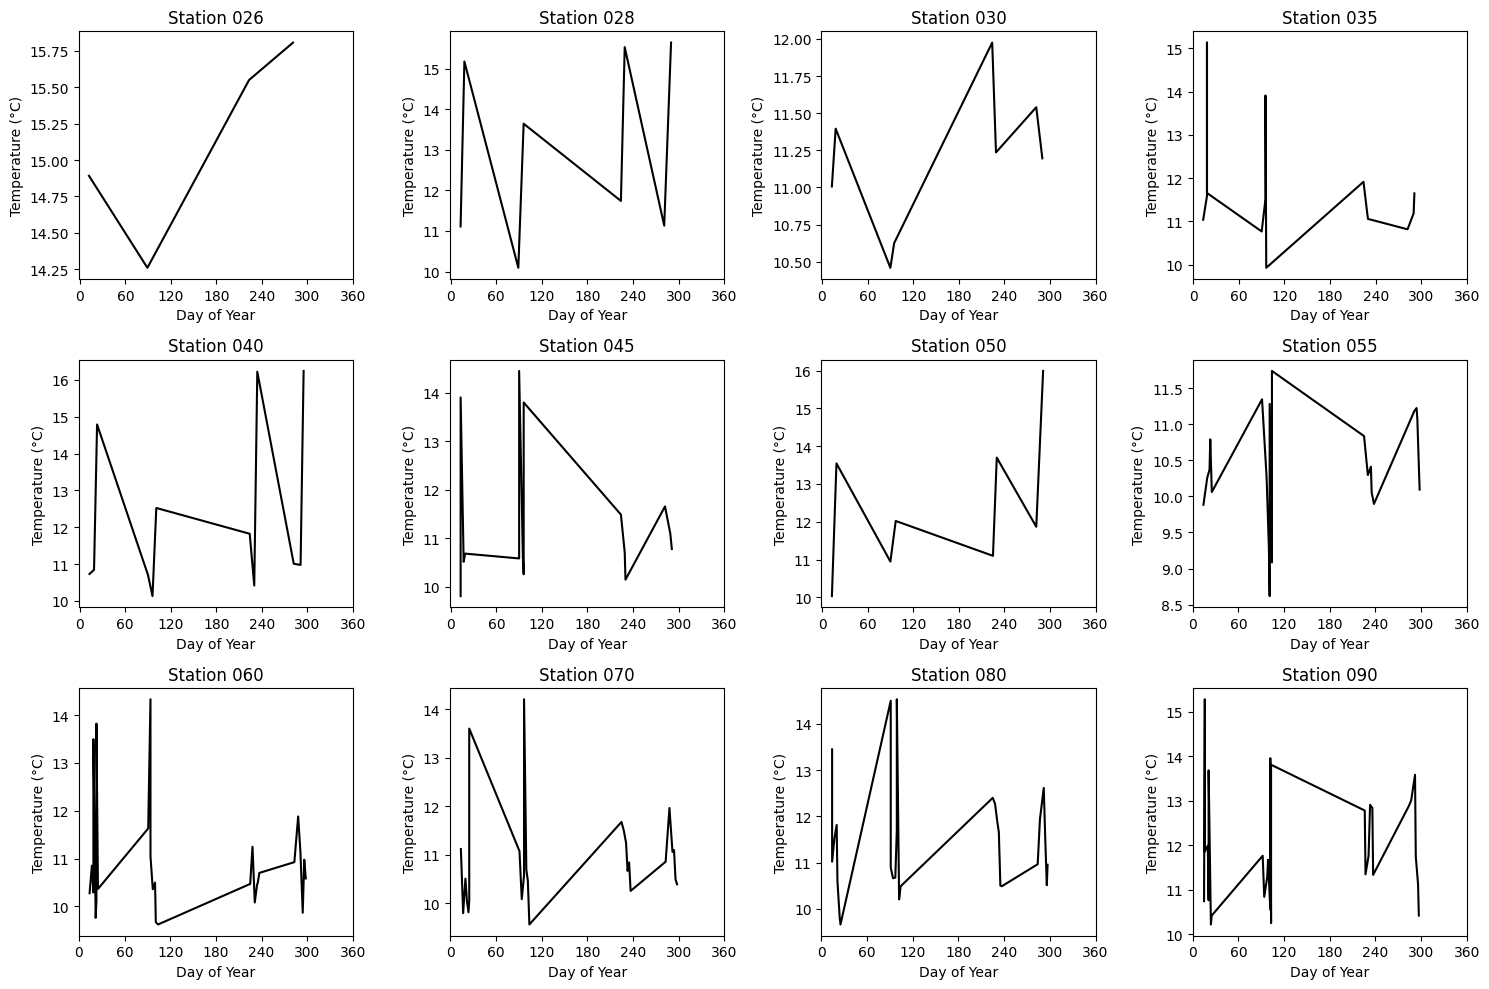

In [273]:
# Ensure the Date column is properly converted to datetime format
temp_data['Date'] = pd.to_datetime(temp_data['Date'], errors='coerce')

# Check for any non-datetime values that were converted to NaT
if temp_data['Date'].isna().any():
    print("Warning: There are invalid dates in the Date column. They have been converted to NaT.")

# Filter temp_data for entries from the year 1993
temp_data_1993 = temp_data[temp_data['Date'].dt.year == 1993]

# Select the first 12 unique stations that have data in 1993
first_12_stations = temp_data_1993['Sta_ID_prefix'].unique()[:12]
data_first_12_stations = temp_data_1993[temp_data_1993['Sta_ID_prefix'].isin(first_12_stations)]

# Create the plot
fig, ax = plt.subplots(3, 4, figsize=(15, 10))
ax = ax.flatten()

# Plot T_degC data for each of the first 12 stations
for i, station in enumerate(first_12_stations):
    station_data = data_first_12_stations[data_first_12_stations['Sta_ID_prefix'] == station]
    
    # Verify there is data to plot for the station
    if not station_data.empty:
        # Use .assign() to avoid the warning
        station_data = station_data.assign(DayOfYear=station_data['Date'].dt.dayofyear)
        ax[i].plot(station_data['DayOfYear'], station_data['T_degC'], c="k")
        ax[i].set_title(f"Station {station}")
        ax[i].set_xlabel("Day of Year")
        ax[i].set_ylabel("Temperature (°C)")
        ax[i].set_xticks(range(0, 366, 60))  # Set intervals for every 60 days for longer spacing
    
plt.tight_layout()
plt.show()

/var/folders/pp/y5y2qg9j3hj_2v8_lfh8f_n40000gn/T/ipykernel_46992/2356021056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  depth_data['Date'] = pd.to_datetime(depth_data['Date'], errors='coerce')


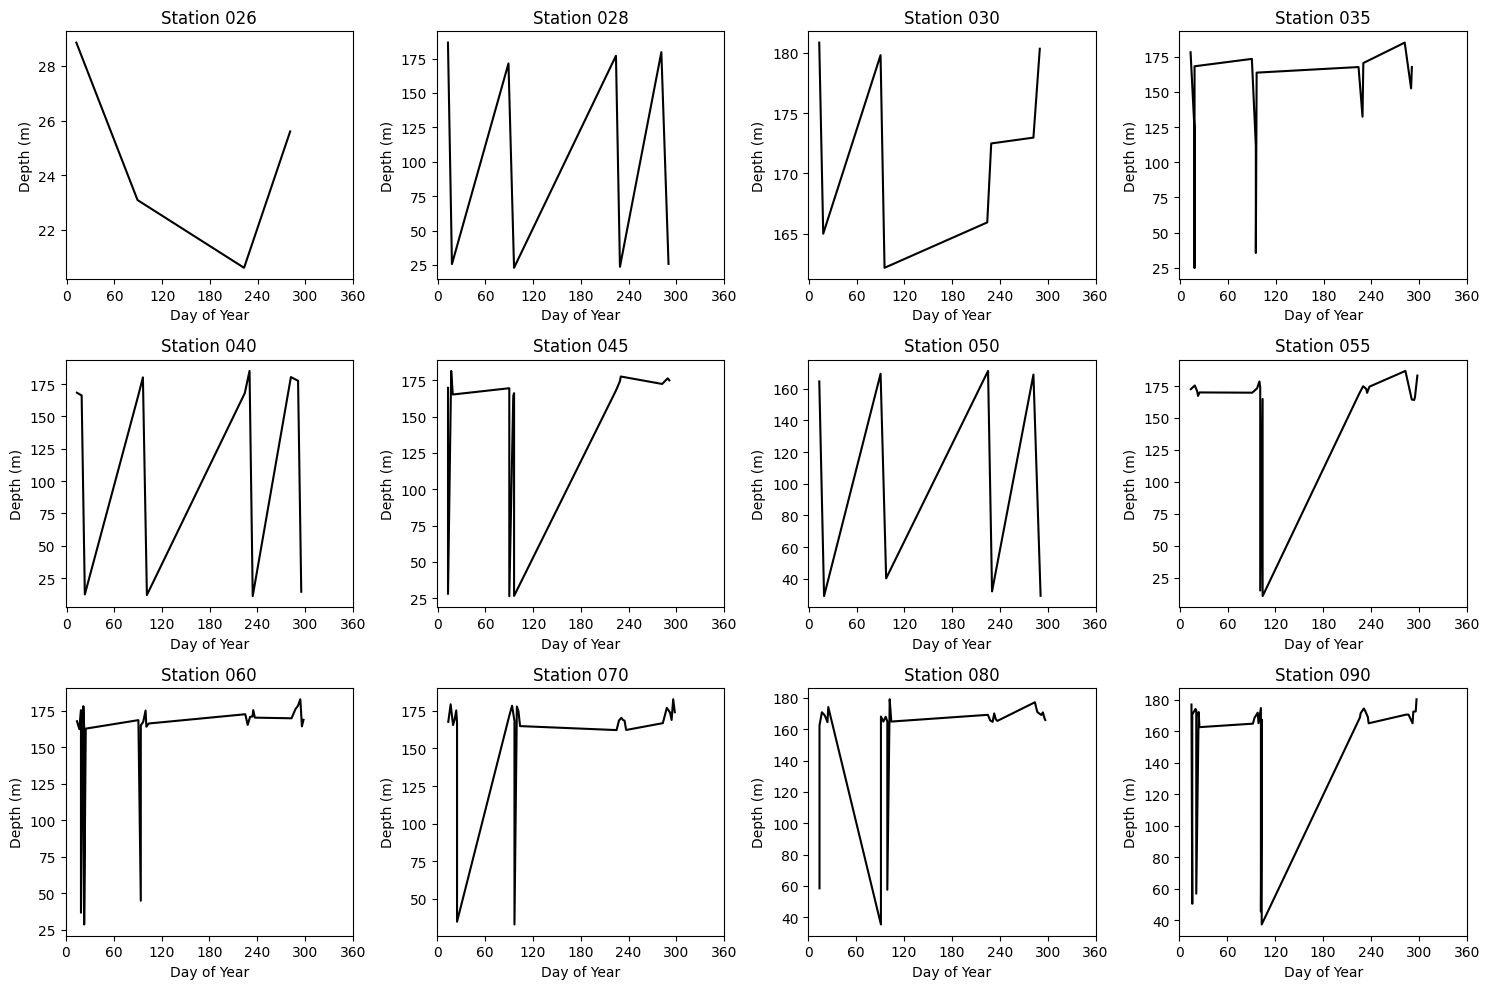

In [274]:
# Ensure the Date column is properly converted to datetime format
depth_data['Date'] = pd.to_datetime(depth_data['Date'], errors='coerce')

# Check for any non-datetime values that were converted to NaT
if depth_data['Date'].isna().any():
    print("Warning: There are invalid dates in the Date column. They have been converted to NaT.")

# Filter depth_data for entries from the year 1993
depth_data_1993 = depth_data[depth_data['Date'].dt.year == 1993]

# Select the first 12 unique stations that have data in 1993
first_12_stations = depth_data_1993['Sta_ID_prefix'].unique()[:12]
data_first_12_stations = depth_data_1993[depth_data_1993['Sta_ID_prefix'].isin(first_12_stations)]

# Create the plot
fig, ax = plt.subplots(3, 4, figsize=(15, 10))
ax = ax.flatten()

# Plot Depthm data for each of the first 12 stations
for i, station in enumerate(first_12_stations):
    station_data = data_first_12_stations[data_first_12_stations['Sta_ID_prefix'] == station]
    
    # Verify there is data to plot for the station
    if not station_data.empty:
        # Use .assign() to avoid the warning
        station_data = station_data.assign(DayOfYear=station_data['Date'].dt.dayofyear)
        ax[i].plot(station_data['DayOfYear'], station_data['Depthm'], c="k")
        ax[i].set_title(f"Station {station}")
        ax[i].set_xlabel("Day of Year")
        ax[i].set_ylabel("Depth (m)")
        ax[i].set_xticks(range(0, 366, 60))  # Set intervals for every 60 days for longer spacing
    
plt.tight_layout()
plt.show()

/var/folders/pp/y5y2qg9j3hj_2v8_lfh8f_n40000gn/T/ipykernel_46992/1405587863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nutrient_data['Date'] = pd.to_datetime(nutrient_data['Date'], errors='coerce')


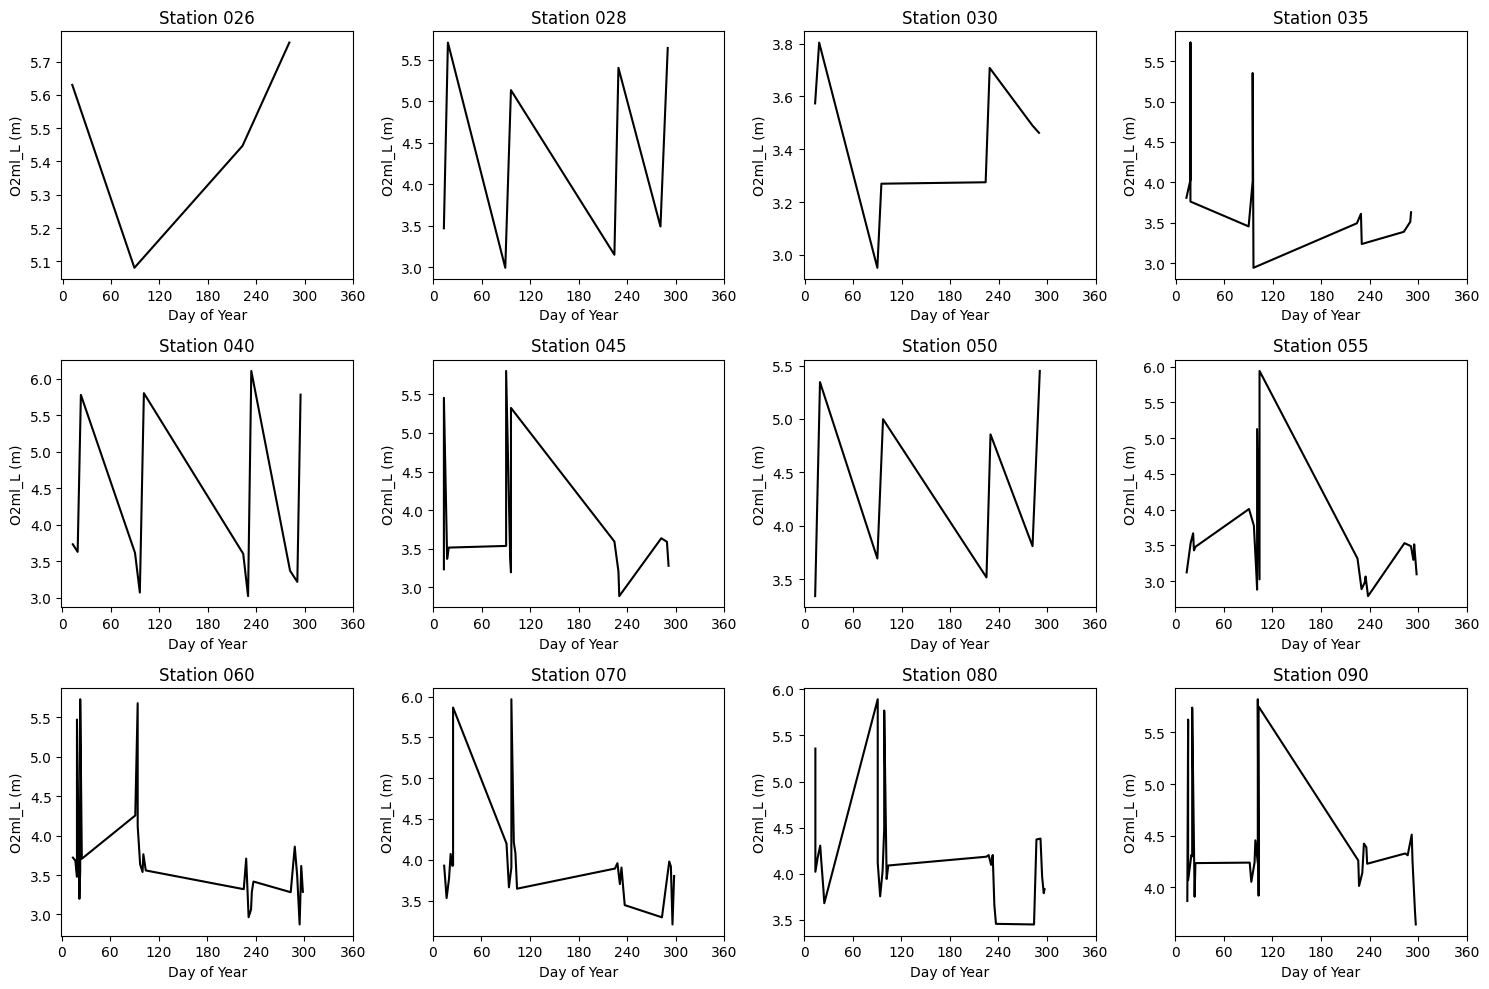

In [275]:
# Ensure the Date column is properly converted to datetime format
nutrient_data['Date'] = pd.to_datetime(nutrient_data['Date'], errors='coerce')

# Check for any non-datetime values that were converted to NaT
if nutrient_data['Date'].isna().any():
    print("Warning: There are invalid dates in the Date column. They have been converted to NaT.")

# Filter depth_data for entries from the year 1993
nutrient_data_1993 = nutrient_data[nutrient_data['Date'].dt.year == 1993]

# Select the first 12 unique stations that have data in 1993
first_12_stations = nutrient_data_1993['Sta_ID_prefix'].unique()[:12]
data_first_12_stations = nutrient_data_1993[nutrient_data_1993['Sta_ID_prefix'].isin(first_12_stations)]

# Create the plot
fig, ax = plt.subplots(3, 4, figsize=(15, 10))
ax = ax.flatten()

# Plot Depthm data for each of the first 12 stations
for i, station in enumerate(first_12_stations):
    station_data = data_first_12_stations[data_first_12_stations['Sta_ID_prefix'] == station]
    
    # Verify there is data to plot for the station
    if not station_data.empty:
        # Use .assign() to avoid the warning
        station_data = station_data.assign(DayOfYear=station_data['Date'].dt.dayofyear)
        ax[i].plot(station_data['DayOfYear'], station_data[nutrient], c="k")
        ax[i].set_title(f"Station {station}")
        ax[i].set_xlabel("Day of Year")
        ax[i].set_ylabel(f"{nutrient} (m)")
        ax[i].set_xticks(range(0, 366, 60))  # Set intervals for every 60 days for longer spacing
    
plt.tight_layout()
plt.show()

## CCA Results per Station

In [276]:
# Reduce the Date to month-year format and take the average for each month
cal_data['MonthYear'] = cal_data['Date'].dt.to_period('M')
temp_data['MonthYear'] = temp_data['Date'].dt.to_period('M')
depth_data['MonthYear'] = depth_data['Date'].dt.to_period('M')
nutrient_data['MonthYear'] = nutrient_data['Date'].dt.to_period('M')

# Group by MonthYear and Sta_ID_prefix, then average the data
cal_data = cal_data.groupby(['MonthYear', 'Sta_ID_prefix']).mean().reset_index()
temp_data = temp_data.groupby(['MonthYear', 'Sta_ID_prefix']).mean().reset_index()
depth_data = depth_data.groupby(['MonthYear', 'Sta_ID_prefix']).mean().reset_index()
nutrient_data = nutrient_data.groupby(['MonthYear', 'Sta_ID_prefix']).mean().reset_index()

# Pivot the datasets with MonthYear as the index
cal_data_pivot = cal_data.pivot(index='MonthYear', columns='Sta_ID_prefix', values='ChlorA')
temp_data_pivot = temp_data.pivot(index='MonthYear', columns='Sta_ID_prefix', values='T_degC')
depth_data_pivot = depth_data.pivot(index='MonthYear', columns='Sta_ID_prefix', values='Depthm')
nutrient_data_pivot = nutrient_data.pivot(index='MonthYear', columns='Sta_ID_prefix', values=nutrient)

/var/folders/pp/y5y2qg9j3hj_2v8_lfh8f_n40000gn/T/ipykernel_46992/849152873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cal_data['MonthYear'] = cal_data['Date'].dt.to_period('M')
/var/folders/pp/y5y2qg9j3hj_2v8_lfh8f_n40000gn/T/ipykernel_46992/849152873.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data['MonthYear'] = temp_data['Date'].dt.to_period('M')
/var/folders/pp/y5y2qg9j3hj_2v8_lfh8f_n40000gn/T/ipykernel_46992/849152873.py:4: SettingWithCopyWarning: 
A value is trying to be set on a

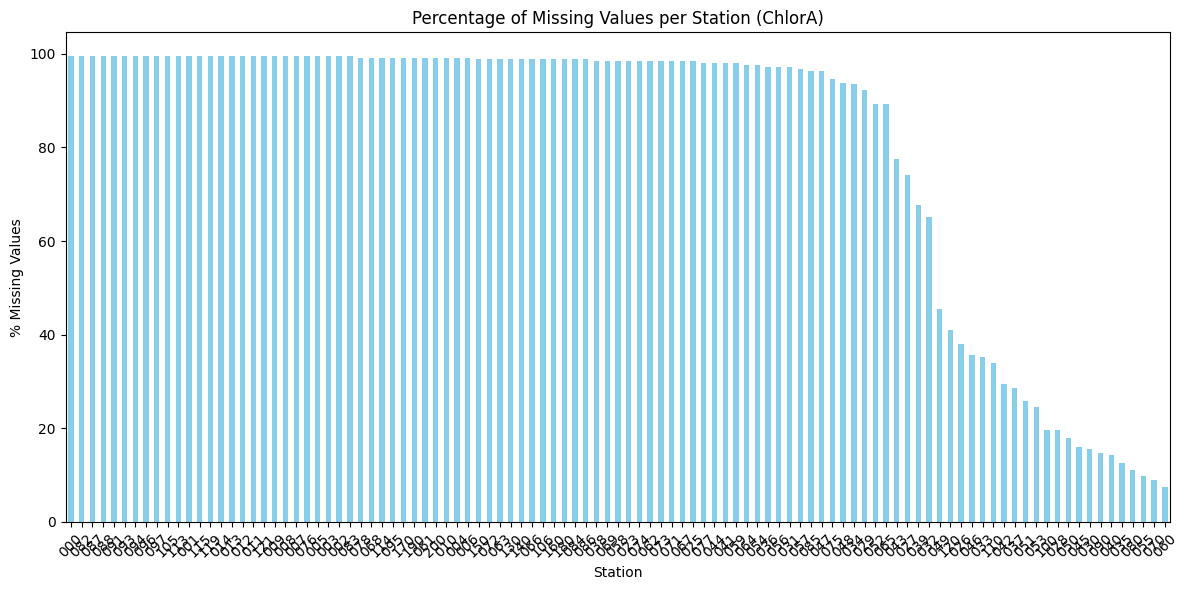

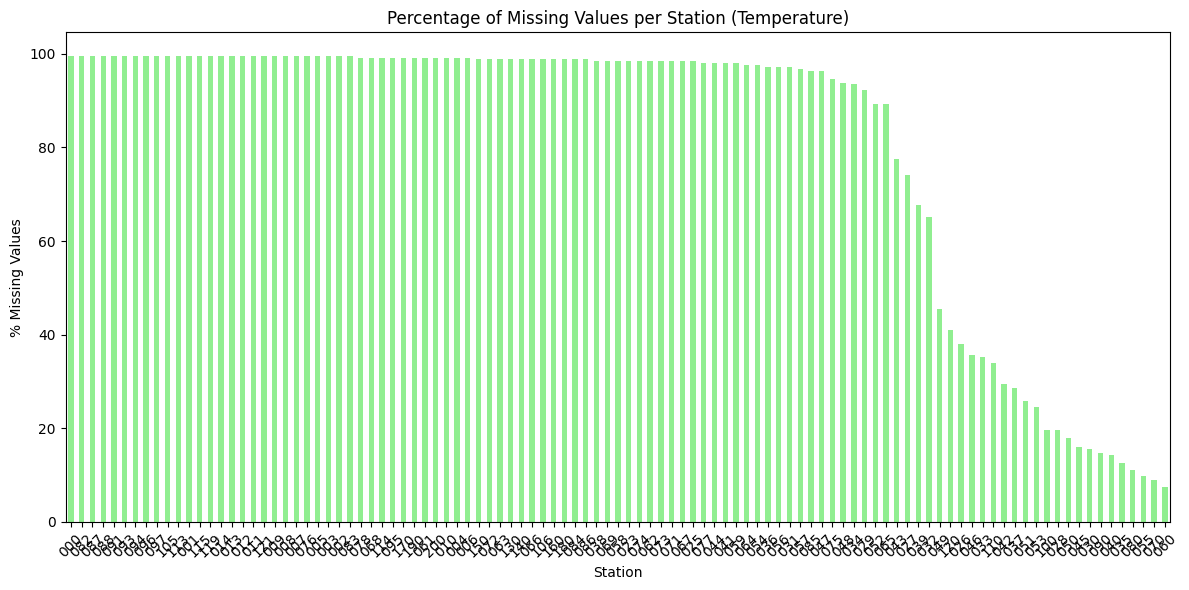

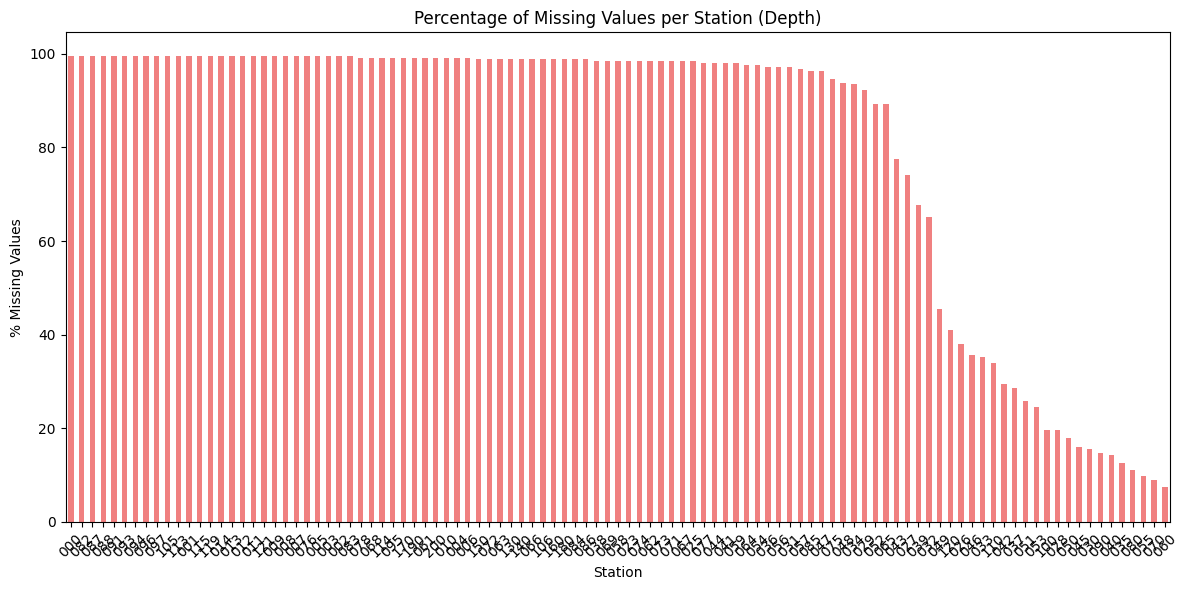

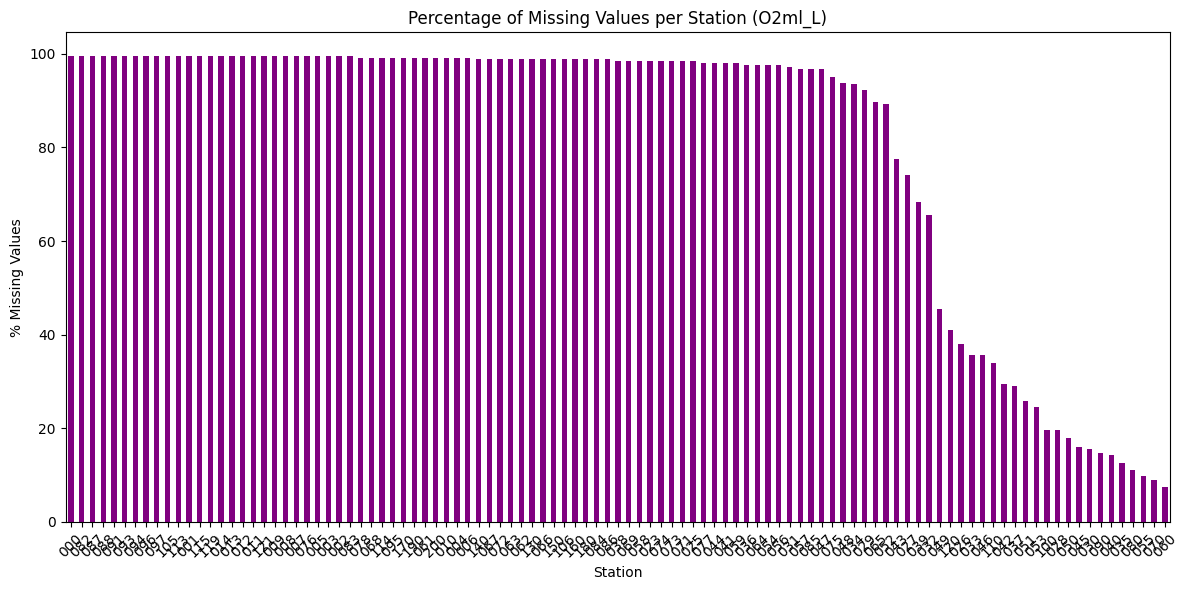

In [277]:
# Calculate the percentage of missing values per station for each dataset
cal_data_missing = cal_data_pivot.isnull().mean() * 100
temp_data_missing = temp_data_pivot.isnull().mean() * 100
depth_data_missing = depth_data_pivot.isnull().mean() * 100
nutrient_data_missing = nutrient_data_pivot.isnull().mean() * 100

# Sort the missing values from max to min for each dataset
cal_data_missing_sorted = cal_data_missing.sort_values(ascending=False)
temp_data_missing_sorted = temp_data_missing.sort_values(ascending=False)
depth_data_missing_sorted = depth_data_missing.sort_values(ascending=False)
nutrient_data_missing_sorted = nutrient_data_missing.sort_values(ascending=False)

# Plot for cal_data
plt.figure(figsize=(12, 6))
cal_data_missing_sorted.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values per Station (ChlorA)')
plt.xlabel('Station')
plt.ylabel('% Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for temp_data
plt.figure(figsize=(12, 6))
temp_data_missing_sorted.plot(kind='bar', color='lightgreen')
plt.title('Percentage of Missing Values per Station (Temperature)')
plt.xlabel('Station')
plt.ylabel('% Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for depth_data
plt.figure(figsize=(12, 6))
depth_data_missing_sorted.plot(kind='bar', color='lightcoral')
plt.title('Percentage of Missing Values per Station (Depth)')
plt.xlabel('Station')
plt.ylabel('% Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for nutrient
plt.figure(figsize=(12, 6))
nutrient_data_missing_sorted.plot(kind='bar', color='purple')
plt.title(f'Percentage of Missing Values per Station ({nutrient})')
plt.xlabel('Station')
plt.ylabel('% Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [278]:
# Threshold for removing stations
threshold = 40  # 40% missing values

# Identify stations to keep (those with <= 40% missing values)
stations_to_keep_cal = cal_data_missing[cal_data_missing <= threshold].index
stations_to_keep_temp = temp_data_missing[temp_data_missing <= threshold].index
stations_to_keep_depth = depth_data_missing[depth_data_missing <= threshold].index
stations_to_keep_nutrient = nutrient_data_missing[nutrient_data_missing <= threshold].index

# Filter the pivoted DataFrames to keep only these stations
cal_data_pivot = cal_data_pivot[stations_to_keep_cal]
temp_data_pivot = temp_data_pivot[stations_to_keep_temp]
depth_data_pivot = depth_data_pivot[stations_to_keep_depth]
nutrient_data_pivot = nutrient_data_pivot[stations_to_keep_depth]

# Drop rows with missing values in the remaining data
cal_data_pivot = cal_data_pivot.dropna()
temp_data_pivot = temp_data_pivot.dropna()
depth_data_pivot = depth_data_pivot.dropna()
nutrient_data_pivot = nutrient_data_pivot.dropna()

In [279]:
cal_data_pivot.tail()

Sta_ID_prefix       026       028       030       033       035       037  \
MonthYear                                                                   
2019-11        1.641785  0.599906  0.393537  0.864375  0.463315  0.240000   
2020-01        1.216333  0.165215  0.266589  0.138625  0.166785  0.070278   
2020-07        3.384181  1.199042  2.065978  1.713833  2.162046  0.411421   
2020-10        0.947500  0.505938  0.944066  0.631444  0.459057  0.380533   
2021-01        1.939429  0.838476  1.021351  1.334167  0.429688  0.170647   

Sta_ID_prefix       040       042       045       046       050       051  \
MonthYear                                                                   
2019-11        0.636642  0.496800  0.274980  0.554333  0.965579  0.827602   
2020-01        0.337857  0.401615  0.227556  0.285529  1.353902  1.001752   
2020-07        1.006447  3.727133  0.906757  1.636789  1.466500  1.873763   
2020-10        0.433849  0.425714  0.316648  0.409706  1.028344  0.828866   
2021-01        0.381491  0.520538  0.387288  0.784214  0.830548  1.271205   

Sta_ID_prefix       053       055       060       070       080       090  \
MonthYear                                                                   
2019-11        0.196762  0.308045  0.272451  0.295149  0.300766  0.181720   
2020-01        0.618550  0.619062  0.456698  0.358941  0.280043  0.220164   
2020-07        0.800952  0.890151  0.416712  0.228521  0.214866  0.154124   
2020-10        0.184312  0.257507  0.196163  0.220897  0.152871  0.144500   
2021-01        0.219750  0.385750  0.256212  0.246526  0.222666  0.219382   

Sta_ID_prefix       100       110  
MonthYear                          
2019-11        0.150919  0.143968  
2020-01        0.189404  0.127611  
2020-07        0.129112  0.140267  
2020-10        0.152594  0.144270  
2021-01        0.217530  0.152417

Variance explained by top 3 PCA modes for ChlorA (X): [0.42618871 0.27636916 0.10524556]
Variance explained by top 3 PCA modes for Temperature (Y): [0.59082042 0.10475785 0.05320356]


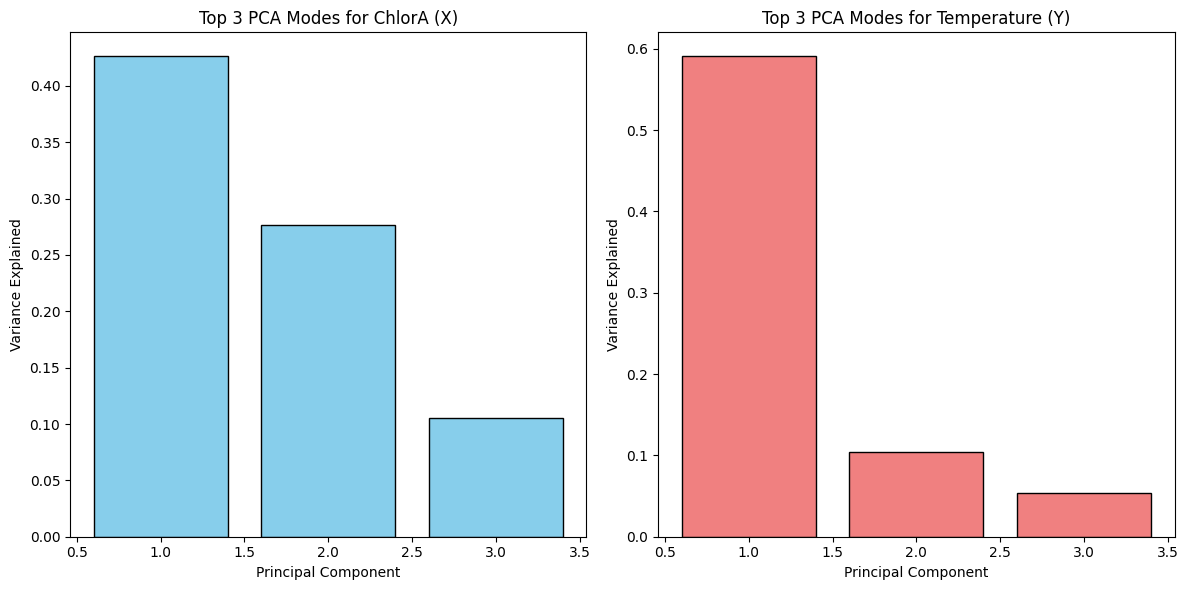

In [302]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Align the DataFrames so they have the same index and columns
common_index = cal_data_pivot.index.intersection(temp_data_pivot.index)
common_columns = cal_data_pivot.columns.intersection(temp_data_pivot.columns)

cal_data_aligned = cal_data_pivot.loc[common_index, common_columns]
temp_data_aligned = temp_data_pivot.loc[common_index, common_columns]

# Ensure data is aligned and contains no missing values
cal_data_aligned = cal_data_aligned.dropna()
temp_data_aligned = temp_data_aligned.dropna()

# Convert to numpy arrays
X = cal_data_aligned.values
Y = temp_data_aligned.values

# Step 2: Apply PCA to each dataset
pca_X = PCA()
pca_Y = PCA()

X_pca = pca_X.fit_transform(X)
Y_pca = pca_Y.fit_transform(Y)

# Step 3: Extract top 3 components and variance explained
X_variance_explained = pca_X.explained_variance_ratio_[:3]
Y_variance_explained = pca_Y.explained_variance_ratio_[:3]

# Display variance explained for top 3 components
print("Variance explained by top 3 PCA modes for ChlorA (X):", X_variance_explained)
print("Variance explained by top 3 PCA modes for Temperature (Y):", Y_variance_explained)

# Create a DataFrame for PCA components and variance
pca_summary_X = pd.DataFrame({
    'Principal Component': [1, 2, 3],
    'Variance Explained': X_variance_explained
})

pca_summary_Y = pd.DataFrame({
    'Principal Component': [1, 2, 3],
    'Variance Explained': Y_variance_explained
})

# Step 4: Plot the top 3 PCA components and variance explained
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot for ChlorA (X)
ax[0].bar(pca_summary_X['Principal Component'], pca_summary_X['Variance Explained'], color='skyblue', edgecolor='black')
ax[0].set_title('Top 3 PCA Modes for ChlorA (X)')
ax[0].set_xlabel('Principal Component')
ax[0].set_ylabel('Variance Explained')

# Plot for Temperature (Y)
ax[1].bar(pca_summary_Y['Principal Component'], pca_summary_Y['Variance Explained'], color='lightcoral', edgecolor='black')
ax[1].set_title('Top 3 PCA Modes for Temperature (Y)')
ax[1].set_xlabel('Principal Component')
ax[1].set_ylabel('Variance Explained')

plt.tight_layout()
plt.show()

In [312]:
cal_data_pivot.head()

Sta_ID_prefix       026       028       030       033       035       037  \
MonthYear                                                                   
1985-02        0.230000  0.189412  0.294167  4.430000  0.327200  0.332632   
1985-05        0.988182  0.890909  0.817794  0.932778  0.619786  0.234091   
1985-08        0.231875  0.567500  0.331747  1.080000  0.230119  0.208571   
1986-02        0.381000  1.421111  0.281711  2.743333  0.406956  0.349205   
1986-05        0.930000  1.240000  0.618000  1.653636  0.573967  0.802847   

Sta_ID_prefix       040       042       045       046       050       051  \
MonthYear                                                                   
1985-02        0.804107  0.815294  0.449279  0.564611  0.612500  1.445833   
1985-05        5.813253  2.126875  1.122513  2.095500  3.725721  5.542327   
1985-08        0.309259  0.353077  0.265450  0.136875  0.476944  0.572929   
1986-02        0.810997  0.558000  0.484048  0.644500  0.612211  0.973030   
1986-05        0.921763  1.417059  0.635965  4.150000  0.675741  1.583766   

Sta_ID_prefix       053       055       060       070       080       090  \
MonthYear                                                                   
1985-02        0.232500  0.366082  0.281200  0.363883  0.164450  0.104531   
1985-05        2.820163  1.679897  0.461478  0.384187  0.200042  0.147486   
1985-08        0.238235  0.295750  0.300453  0.190923  0.194448  0.124441   
1986-02        0.451500  0.423680  0.152998  0.240310  0.127876  0.100715   
1986-05        0.171667  1.201626  0.743126  0.297765  0.163794  0.137805   

Sta_ID_prefix       100       110  
MonthYear                          
1985-02        0.117632  0.110855  
1985-05        0.106071  0.109643  
1985-08        0.102468  0.131722  
1986-02        0.126057  0.090405  
1986-05        0.149005  0.126500

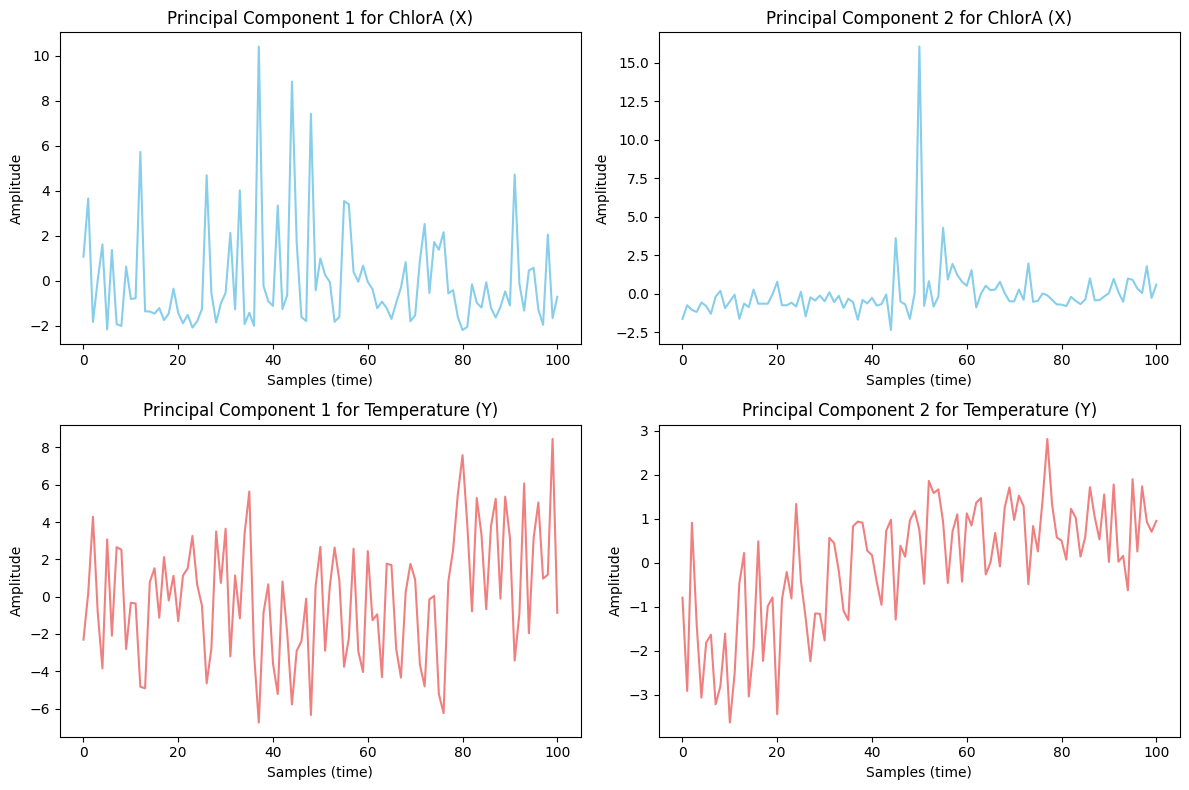

In [314]:
# Step 5: Plot the top 2 principal components as time series for both datasets

# Prepare a figure
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Plot the first two PCs for ChlorA (X)
for i in range(2):  # First two principal components
    ax[0, i].plot(X_pca[:, i], color='skyblue')
    ax[0, i].set_title(f'Principal Component {i+1} for ChlorA (X)')
    ax[0, i].set_xlabel('Samples (time)')
    ax[0, i].set_ylabel('Amplitude')

# Plot the first two PCs for Temperature (Y)
for i in range(2):  # First two principal components
    ax[1, i].plot(Y_pca[:, i], color='lightcoral')
    ax[1, i].set_title(f'Principal Component {i+1} for Temperature (Y)')
    ax[1, i].set_xlabel('Samples (time)')
    ax[1, i].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

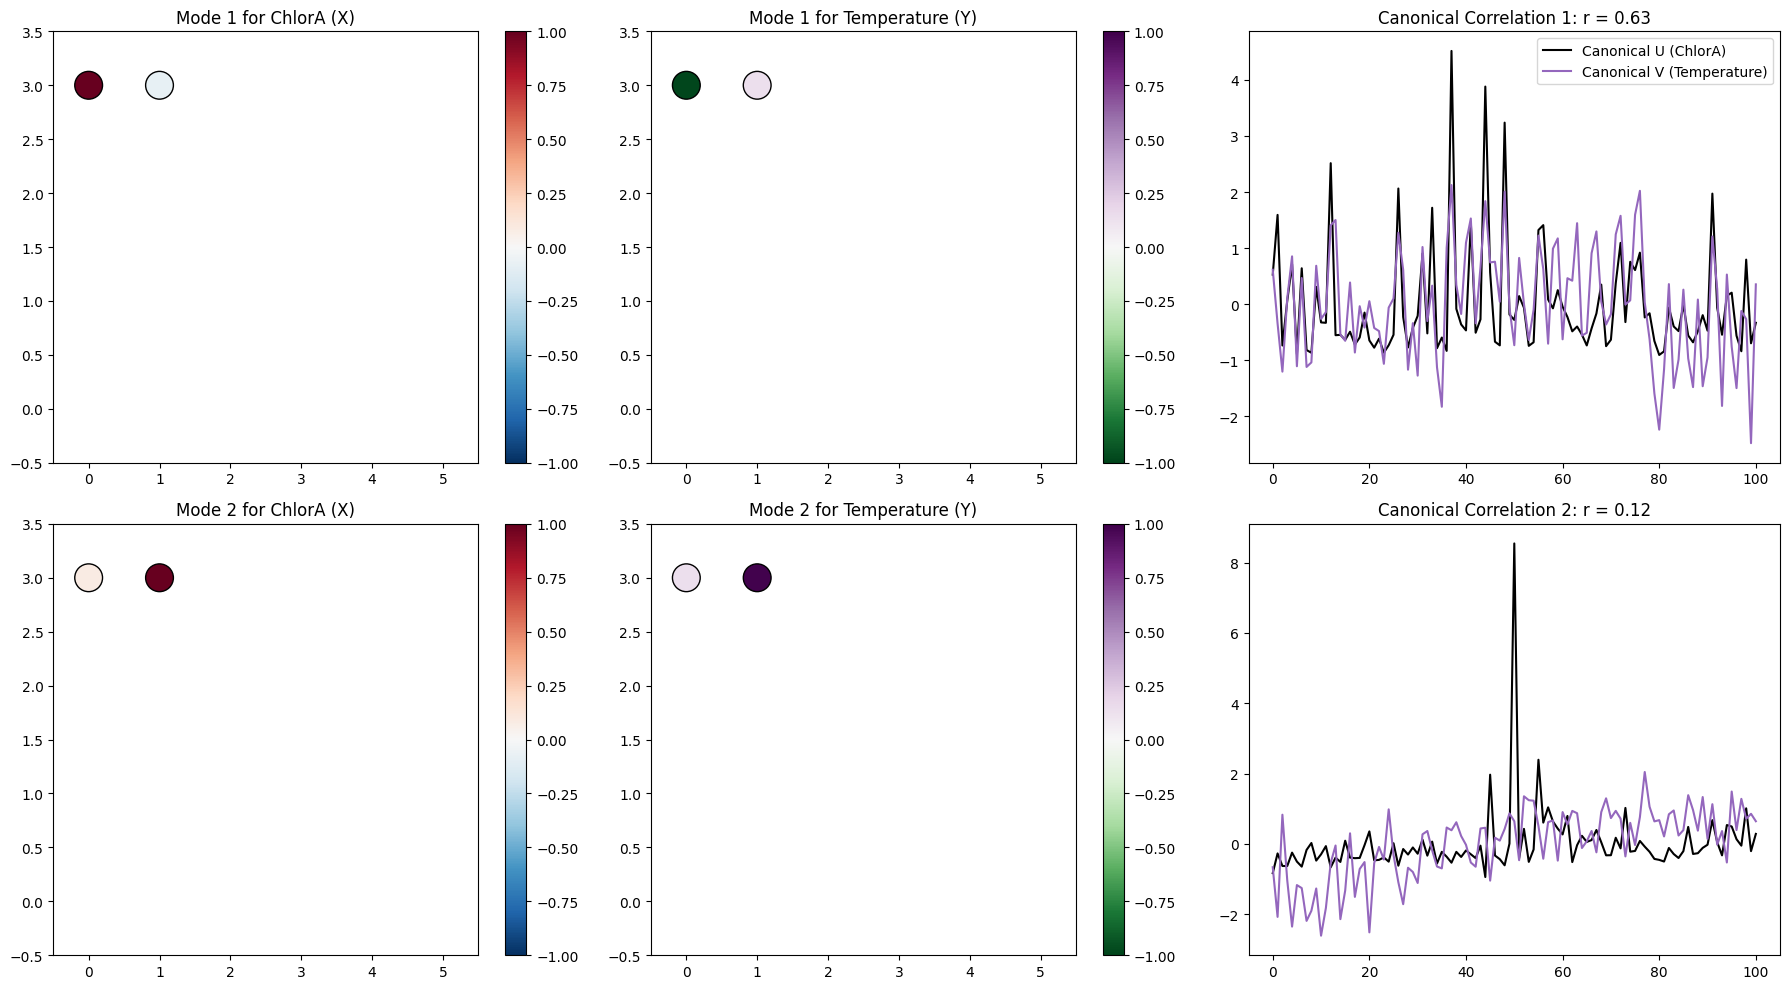

In [310]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA

# Align the DataFrames so they have the same index and columns
common_index = cal_data_pivot.index.intersection(temp_data_pivot.index)
common_columns = cal_data_pivot.columns.intersection(temp_data_pivot.columns)

cal_data_aligned = cal_data_pivot.loc[common_index, common_columns]
temp_data_aligned = temp_data_pivot.loc[common_index, common_columns]

# Ensure data is aligned and contains no missing values
cal_data_aligned = cal_data_aligned.dropna()
temp_data_aligned = temp_data_aligned.dropna()

# Convert to numpy arrays
X = cal_data_aligned.values
Y = temp_data_aligned.values

# Apply PCA and keep the first two modes
pca_X = PCA(n_components=2)
pca_Y = PCA(n_components=2)

X_pca = pca_X.fit_transform(X)
Y_pca = pca_Y.fit_transform(Y)

# Perform CCA on the reduced datasets
cca = CCA(n_components=2)
U, V = cca.fit_transform(X_pca, Y_pca)

# Prepare to plot modes and correlations
fig, ax = plt.subplots(2, 3, figsize=(18, 10))

for i in range(2):  # Plot first 2 modes
    # Plot X mode vector
    out = ax[i, 0].scatter(
        np.arange(X_pca.shape[1]) % 6,
        3 - np.arange(X_pca.shape[1]) // 6,
        c=cca.x_weights_[:, i],
        s=400,
        cmap="RdBu_r",
        edgecolors="k",
        vmin=-1,
        vmax=1
    )
    ax[i, 0].set_ylim(-0.5, 3.5)
    ax[i, 0].set_xlim(-0.5, 5.5)
    ax[i, 0].set_title(f"Mode {i+1} for ChlorA (X)")
    plt.colorbar(out, ax=ax[i, 0])

    # Plot Y mode vector
    out = ax[i, 1].scatter(
        np.arange(Y_pca.shape[1]) % 6,
        3 - np.arange(Y_pca.shape[1]) // 6,
        c=cca.y_weights_[:, i],
        s=400,
        cmap="PRGn_r",
        edgecolors="k",
        vmin=-1,
        vmax=1
    )
    ax[i, 1].set_ylim(-0.5, 3.5)
    ax[i, 1].set_xlim(-0.5, 5.5)
    ax[i, 1].set_title(f"Mode {i+1} for Temperature (Y)")
    plt.colorbar(out, ax=ax[i, 1])

    # Plot canonical variables (U and V)
    ax[i, 2].plot(U[:, i], label="Canonical U (ChlorA)", c="k")
    ax[i, 2].plot(V[:, i], label="Canonical V (Temperature)", c="C4")
    r = np.corrcoef(U[:, i], V[:, i])[0, 1]
    ax[i, 2].set_title(f"Canonical Correlation {i+1}: r = {round(r, 2)}")

    if i == 0:
        ax[i, 2].legend()

plt.tight_layout()
plt.show()

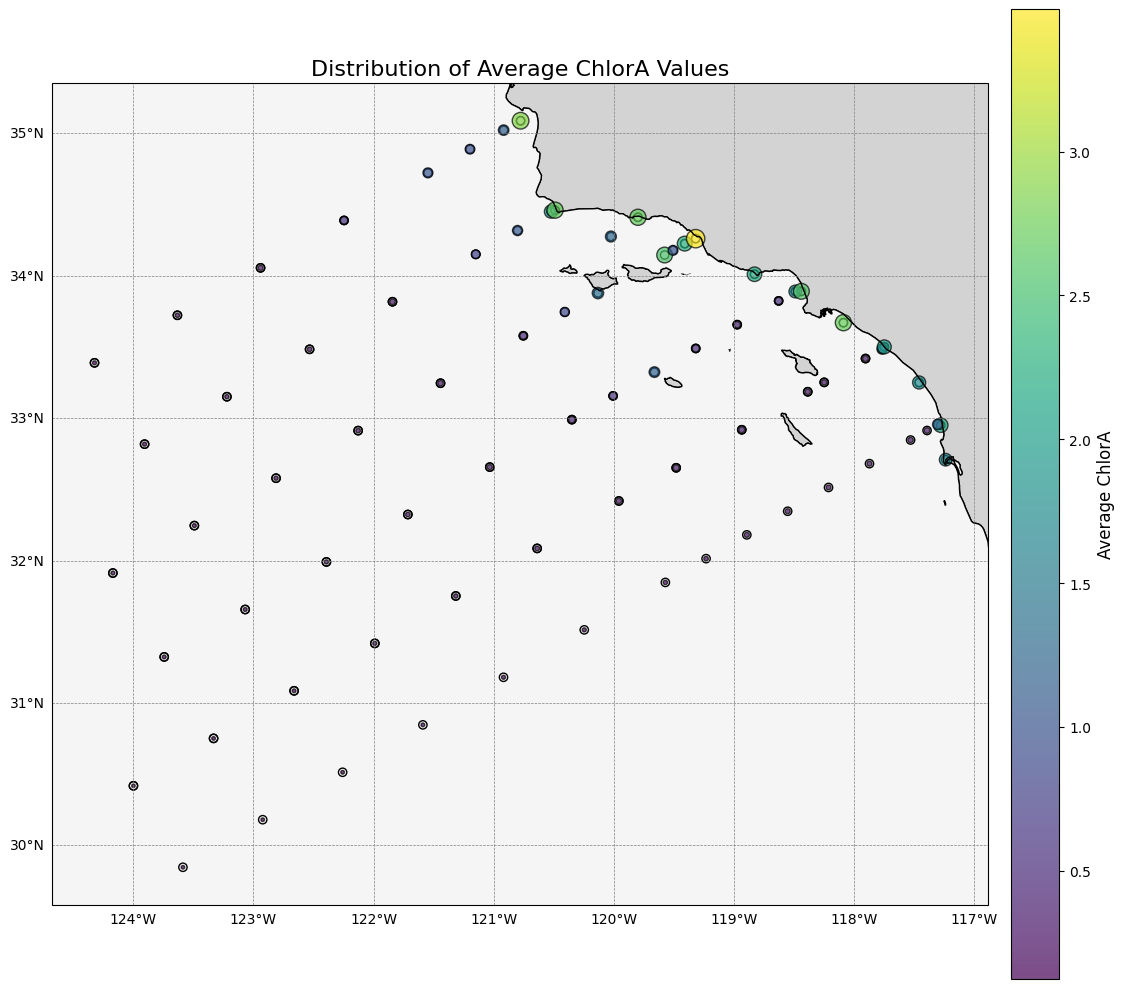

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

# Step 1: Load and correct latitude and longitude
# Read the KML file using GeoPandas
gdf = gpd.read_file('Datasets/CalCOFI_75StandardStations.kml')
gdf = gdf.to_crs(epsg=4326)  # Ensure CRS matches the lat/lon format

# Extract the coordinates from the background map
map_coords = np.array(list(zip(gdf.geometry.y, gdf.geometry.x)))

# Create a copy of the locations DataFrame to modify
adjusted_data_clean = data_clean.copy()

# Replace each lat/lon in the data with the nearest lat/lon from the map
for idx, row in adjusted_data_clean.iterrows():
    data_point = np.array([[row['Lat_Dec'], row['Lon_Dec']]])
    distances = euclidean_distances(data_point, map_coords)
    nearest_idx = np.argmin(distances)
    adjusted_data_clean.at[idx, 'Lat_Dec'] = map_coords[nearest_idx][0]
    adjusted_data_clean.at[idx, 'Lon_Dec'] = map_coords[nearest_idx][1]

# Step 2: Calculate average ChlorA for each location
avg_chlorA = adjusted_data_clean.groupby(['Lat_Dec', 'Lon_Dec'])['ChlorA'].mean().reset_index()

# Step 3: Plot the map with circular bands
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add coastlines and geographical features
ax.coastlines(resolution='10m', color='black')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgrey')
ax.add_feature(cfeature.OCEAN, facecolor='whitesmoke')

# Add gridlines
gridlines = ax.gridlines(draw_labels=True, color='gray', linestyle='--', linewidth=0.5)
gridlines.top_labels = False
gridlines.left_labels = True
gridlines.right_labels = False
gridlines.bottom_labels = True

# Plot the background map
gdf.plot(ax=ax, transform=ccrs.PlateCarree(), color='none', edgecolor='black')

# Plot the average ChlorA values with circular bands
scatter = ax.scatter(
    avg_chlorA['Lon_Dec'],
    avg_chlorA['Lat_Dec'],
    c=avg_chlorA['ChlorA'],
    s=avg_chlorA['ChlorA'] * 50,  # Scale size by ChlorA value
    cmap='viridis',
    alpha=0.7,
    edgecolor='black',
    transform=ccrs.PlateCarree()
)

# Add a color bar
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('Average ChlorA', fontsize=12)

# Add labels and title
plt.title('Distribution of Average ChlorA Values', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

Canonical Correlations (r): [np.float64(0.8946901393725174), np.float64(0.8651658171156558), np.float64(0.8144719851312057), np.float64(0.7445235449988798), np.float64(0.7309725645131133), np.float64(0.6461543562557652), np.float64(0.5697579779425799), np.float64(0.5484544923370448), np.float64(0.49470762288029196), np.float64(0.4559275549352101), np.float64(0.41091985421776295), np.float64(0.36857993115066284), np.float64(0.3124287888583898), np.float64(0.28730305767793424), np.float64(0.2582506870989352), np.float64(0.20308905629390914), np.float64(0.14617954244070566), np.float64(0.08890523526141725), np.float64(0.05799512403845727), np.float64(0.009809009589477898)]
Proportion of Variance Explained in X (ChlorA): [0.05854117 0.0317638  0.0289103  0.0419345  0.03162591 0.04299259
 0.0238462  0.01943904 0.0308219  0.06583261 0.05590865 0.02978858
 0.03314734 0.06326911 0.07452655 0.03894611 0.0435368  0.06269584
 0.06067689 0.04718999]
Proportion of Variance Explained in Y (Depth): [

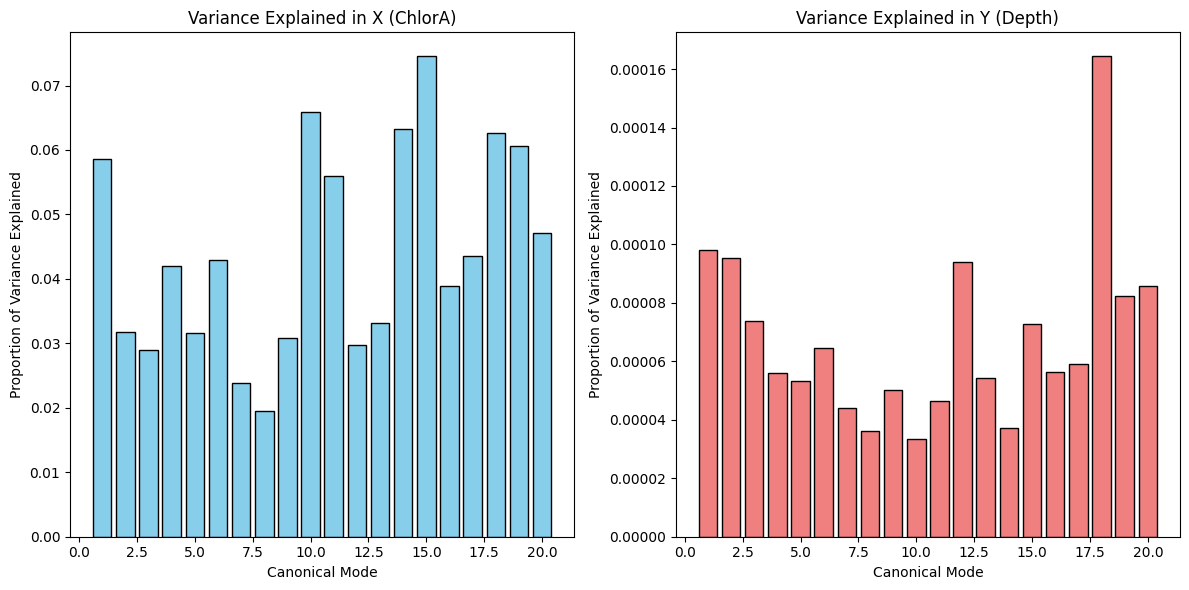

In [299]:
# Calculate the canonical correlations (r values)
canonical_correlations = [np.corrcoef(U[:, i], V[:, i])[0, 1] for i in range(n_components)]

# Proportion of variance explained
X_var_explained = np.var(U, axis=0) / np.sum(np.var(X, axis=0))
Y_var_explained = np.var(V, axis=0) / np.sum(np.var(Y, axis=0))

# Display variance explained
print("Canonical Correlations (r):", canonical_correlations)
print("Proportion of Variance Explained in X (ChlorA):", X_var_explained)
print("Proportion of Variance Explained in Y (Depth):", Y_var_explained)

# Plot variance explained
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].bar(range(1, n_components + 1), X_var_explained, color='skyblue', edgecolor='black')
ax[0].set_title('Variance Explained in X (ChlorA)')
ax[0].set_xlabel('Canonical Mode')
ax[0].set_ylabel('Proportion of Variance Explained')

ax[1].bar(range(1, n_components + 1), Y_var_explained, color='lightcoral', edgecolor='black')
ax[1].set_title('Variance Explained in Y (Depth)')
ax[1].set_xlabel('Canonical Mode')
ax[1].set_ylabel('Proportion of Variance Explained')

plt.tight_layout()
plt.show()

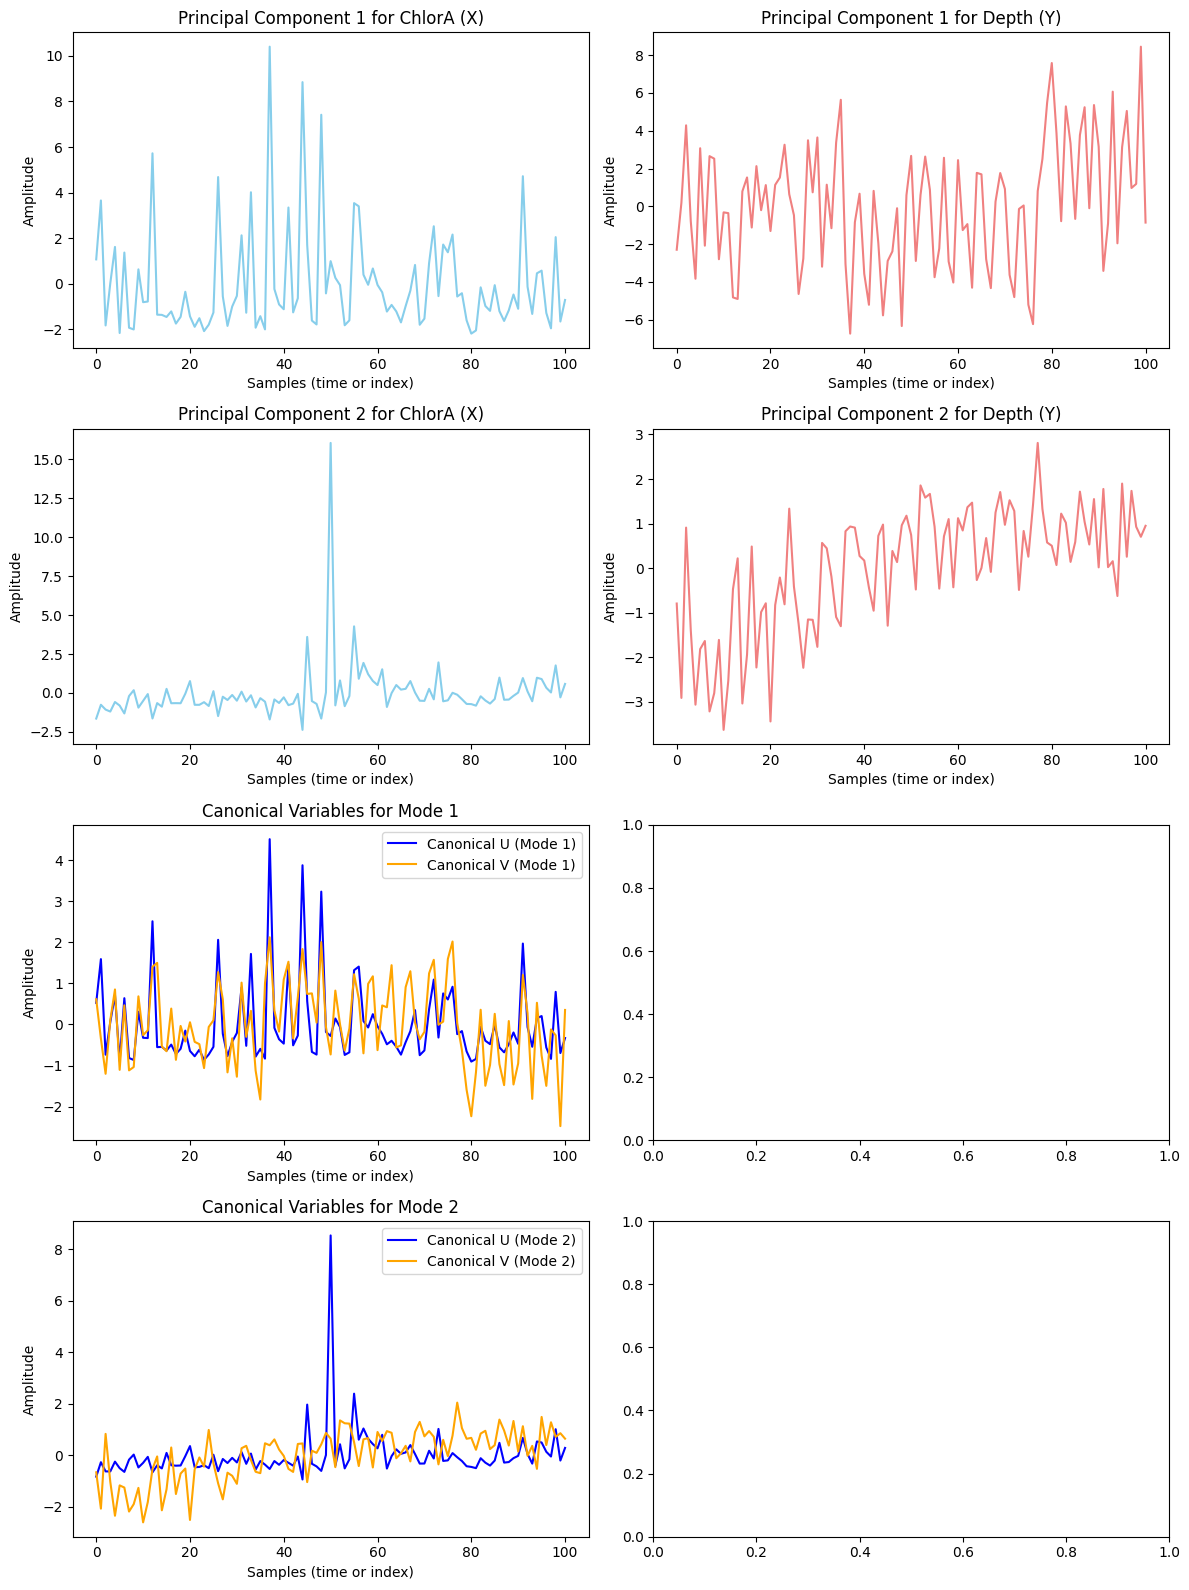

In [315]:
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Apply PCA to both datasets
pca_X = PCA(n_components=2)
pca_Y = PCA(n_components=2)

X_pca = pca_X.fit_transform(X)
Y_pca = pca_Y.fit_transform(Y)

# Perform CCA using the reduced PCA components
cca = CCA(n_components=2)
U, V = cca.fit_transform(X_pca, Y_pca)

# Step 2: Plot the first two PCs and CCA canonical variables
fig, ax = plt.subplots(4, 2, figsize=(12, 16))

# Plot the first two principal components for X (ChlorA)
for i in range(2):
    ax[i, 0].plot(X_pca[:, i], color="skyblue")
    ax[i, 0].set_title(f"Principal Component {i+1} for ChlorA (X)")
    ax[i, 0].set_xlabel("Samples (time or index)")
    ax[i, 0].set_ylabel("Amplitude")

# Plot the first two principal components for Y (Depth)
for i in range(2):
    ax[i, 1].plot(Y_pca[:, i], color="lightcoral")
    ax[i, 1].set_title(f"Principal Component {i+1} for Depth (Y)")
    ax[i, 1].set_xlabel("Samples (time or index)")
    ax[i, 1].set_ylabel("Amplitude")

# Plot the first two canonical variables (U and V)
for i in range(2):
    ax[i + 2, 0].plot(U[:, i], label=f"Canonical U (Mode {i+1})", color="blue")
    ax[i + 2, 0].plot(V[:, i], label=f"Canonical V (Mode {i+1})", color="orange")
    ax[i + 2, 0].set_title(f"Canonical Variables for Mode {i+1}")
    ax[i + 2, 0].set_xlabel("Samples (time or index)")
    ax[i + 2, 0].set_ylabel("Amplitude")
    ax[i + 2, 0].legend()

plt.tight_layout()
plt.show()

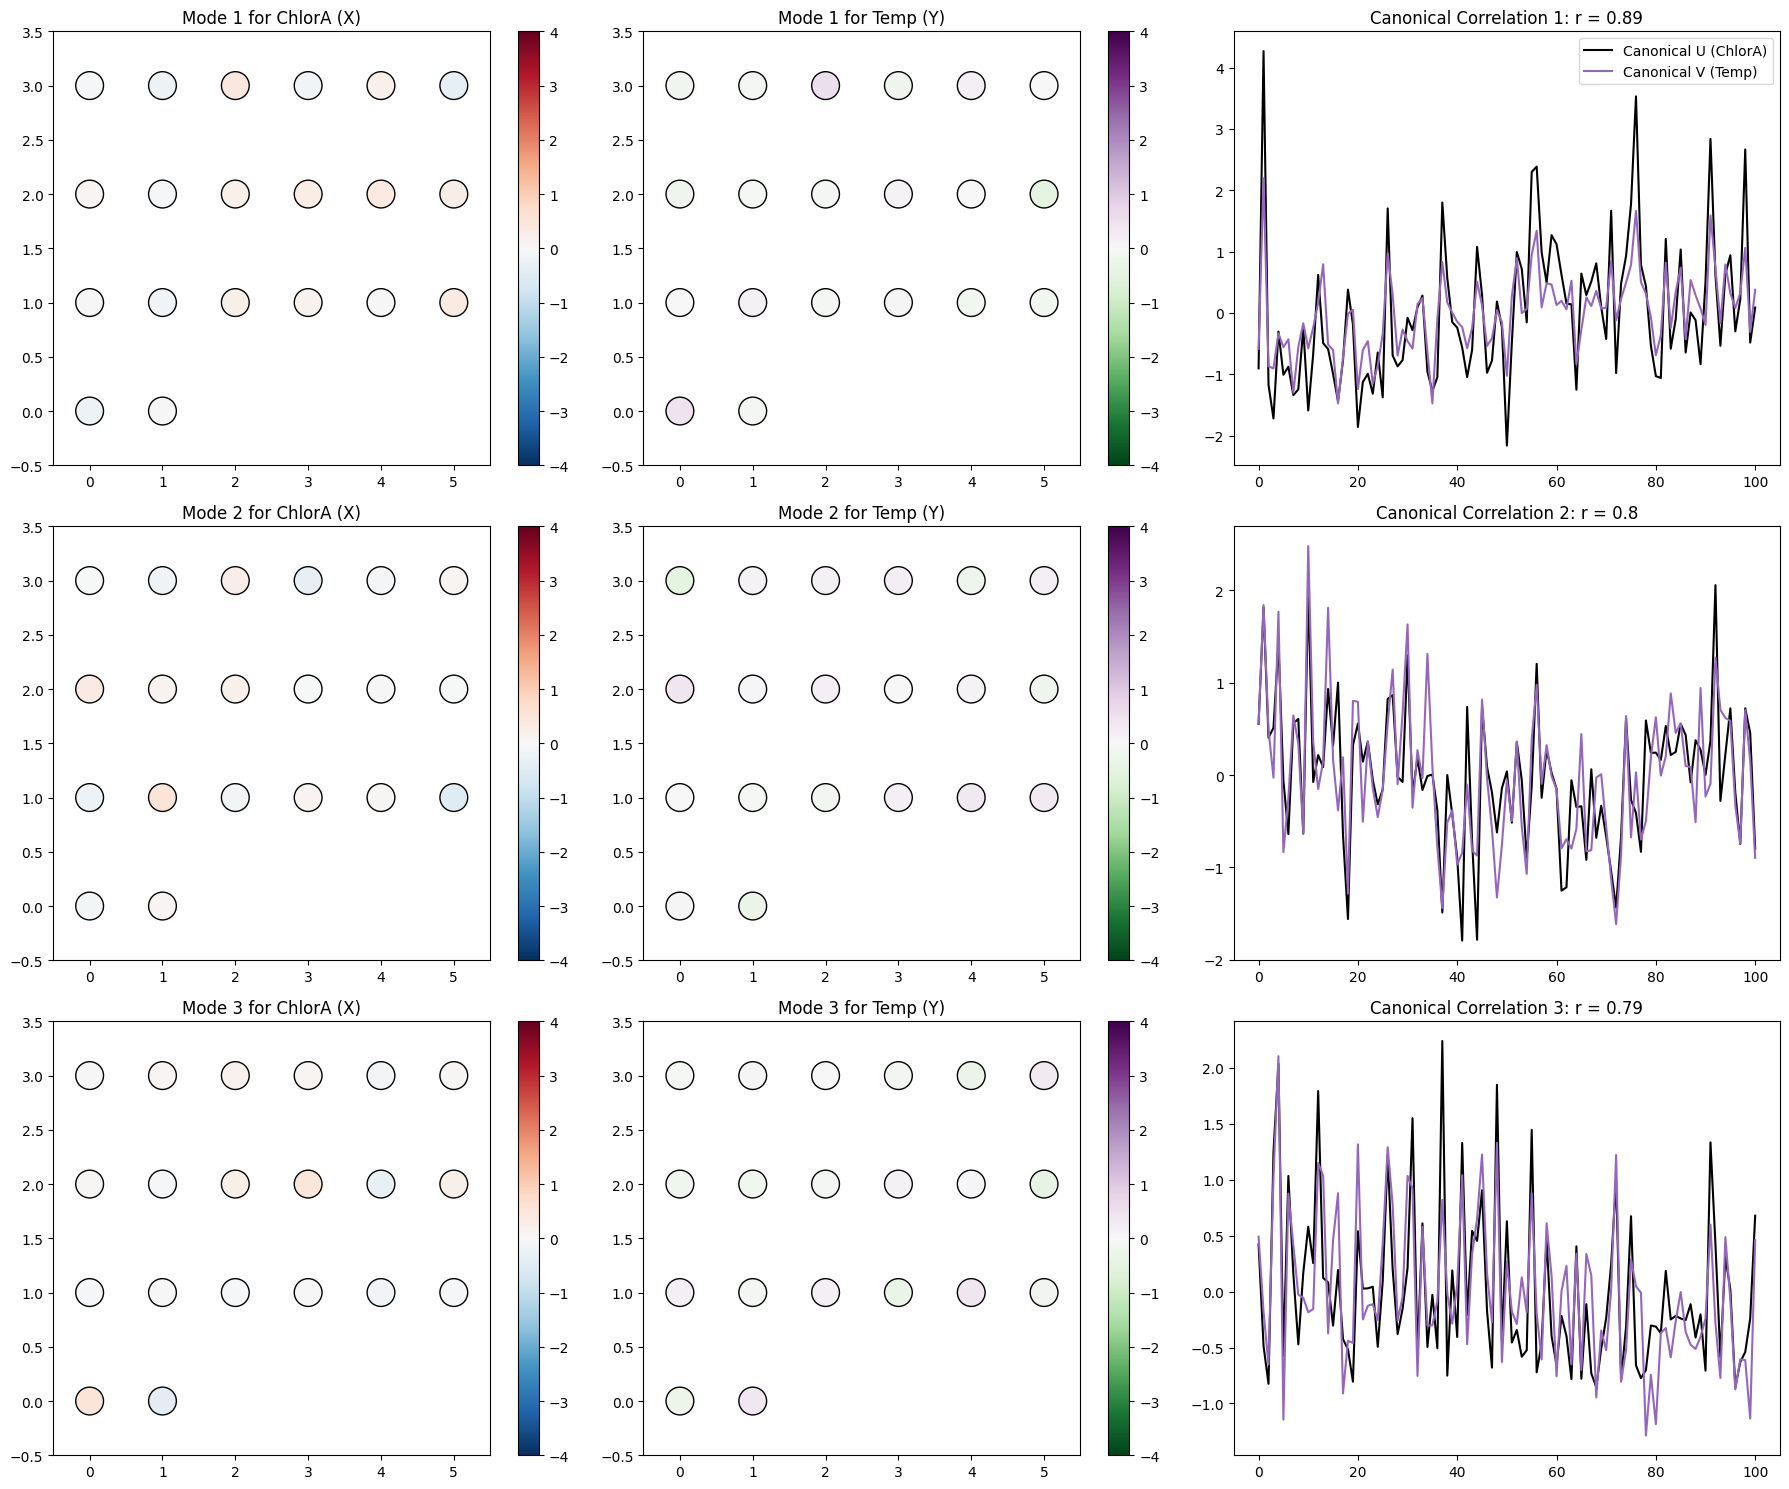

In [317]:
# Align the DataFrames so they have the same index and columns
common_index = cal_data_pivot.index.intersection(temp_data_pivot.index)
common_columns = cal_data_pivot.columns.intersection(temp_data_pivot.columns)

cal_data_aligned = cal_data_pivot.loc[common_index, common_columns]
temp_data_aligned = temp_data_pivot.loc[common_index, common_columns]

# Ensure data is aligned and contains no missing values
cal_data_aligned = cal_data_aligned.dropna()
temp_data_aligned = temp_data_aligned.dropna()

# Convert to numpy arrays for CCA
X = cal_data_aligned.values
Y = temp_data_aligned.values

# Perform CCA with a suitable number of components
n_components = min(X.shape[1], Y.shape[1])
cca = CCA(n_components=n_components)
U, V = cca.fit_transform(X, Y)

# Prepare to plot up to 6 modes or as many as available
n_modes = min(3, n_components)
fig, ax = plt.subplots(n_modes, 3, figsize=(18, 5 * n_modes))

for i in range(n_modes):
    # Plot X mode vector (A)
    out = ax[i, 0].scatter(
        np.arange(X.shape[1]) % 6,  # Set a 4x6 grid layout for the 22 stations
        3 - np.arange(X.shape[1]) // 6,
        c=cca.x_weights_[:, i],
        s=400,  # Adjust the size of the circles as needed
        cmap="RdBu_r",
        edgecolors="k",
        vmin=-4,
        vmax=4
    )
    ax[i, 0].set_ylim(-0.5, 3.5)
    ax[i, 0].set_xlim(-0.5, 5.5)
    ax[i, 0].set_title(f"Mode {i+1} for ChlorA (X)")
    plt.colorbar(out, ax=ax[i, 0])

    # Plot Y mode vector (B)
    out = ax[i, 1].scatter(
        np.arange(Y.shape[1]) % 6,
        3 - np.arange(Y.shape[1]) // 6,
        c=cca.y_weights_[:, i],
        s=400,  # Adjust the size of the circles as needed
        cmap="PRGn_r",
        edgecolors="k",
        vmin=-4,
        vmax=4
    )
    ax[i, 1].set_ylim(-0.5, 3.5)
    ax[i, 1].set_xlim(-0.5, 5.5)
    ax[i, 1].set_title(f"Mode {i+1} for Temp (Y)")
    plt.colorbar(out, ax=ax[i, 1])

    # Plot U and V (canonical variables)
    ax[i, 2].plot(U[:, i], label="Canonical U (ChlorA)", c="k")
    ax[i, 2].plot(V[:, i], label="Canonical V (Temp)", c="C4")
    r = np.corrcoef(U[:, i], V[:, i])[0, 1]
    ax[i, 2].set_title(f"Canonical Correlation {i+1}: r = {round(r, 2)}")

    if i == 0:
        ax[i, 2].legend()

plt.tight_layout()
plt.show()

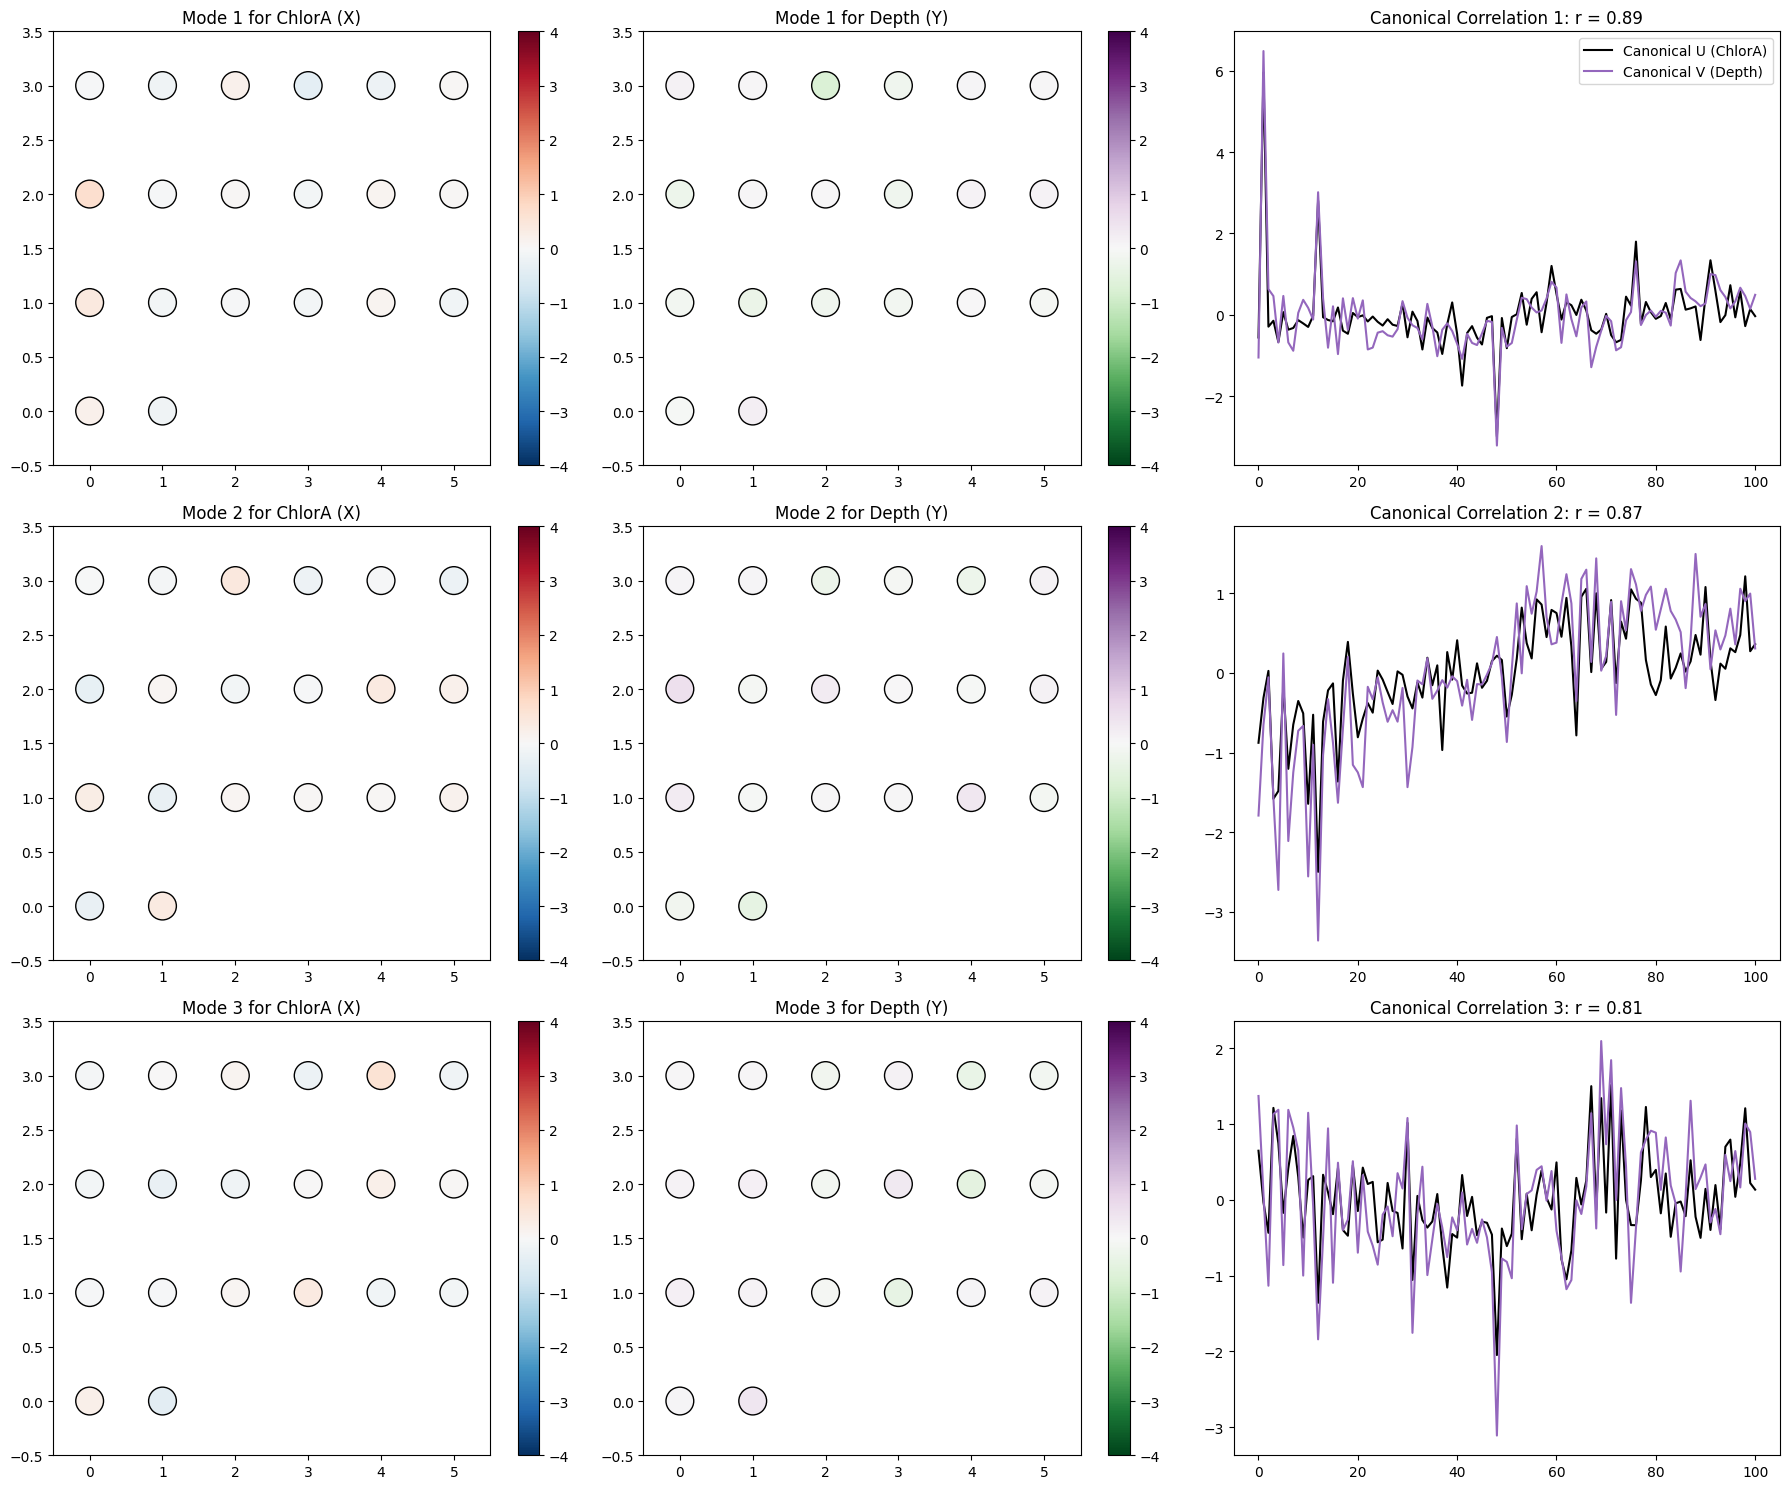

In [300]:
# Align the DataFrames so they have the same index and columns
common_index = cal_data_pivot.index.intersection(depth_data_pivot.index)
common_columns = cal_data_pivot.columns.intersection(depth_data_pivot.columns)

cal_data_aligned = cal_data_pivot.loc[common_index, common_columns]
depth_data_aligned = depth_data_pivot.loc[common_index, common_columns]

# Ensure data is aligned and contains no missing values
cal_data_aligned = cal_data_aligned.dropna()
depth_data_aligned = depth_data_aligned.dropna()

# Convert to numpy arrays for CCA
X = cal_data_aligned.values
Y = depth_data_aligned.values

# Perform CCA with a suitable number of components
n_components = min(X.shape[1], Y.shape[1])
cca = CCA(n_components=n_components)
U, V = cca.fit_transform(X, Y)

# Prepare to plot up to 6 modes or as many as available
n_modes = min(3, n_components)
fig, ax = plt.subplots(n_modes, 3, figsize=(18, 5 * n_modes))

for i in range(n_modes):
    # Plot X mode vector (A)
    out = ax[i, 0].scatter(
        np.arange(X.shape[1]) % 6,  # Set a 4x6 grid layout for the 22 stations
        3 - np.arange(X.shape[1]) // 6,
        c=cca.x_weights_[:, i],
        s=400,  # Adjust the size of the circles as needed
        cmap="RdBu_r",
        edgecolors="k",
        vmin=-4,
        vmax=4
    )
    ax[i, 0].set_ylim(-0.5, 3.5)
    ax[i, 0].set_xlim(-0.5, 5.5)
    ax[i, 0].set_title(f"Mode {i+1} for ChlorA (X)")
    plt.colorbar(out, ax=ax[i, 0])

    # Plot Y mode vector (B)
    out = ax[i, 1].scatter(
        np.arange(Y.shape[1]) % 6,
        3 - np.arange(Y.shape[1]) // 6,
        c=cca.y_weights_[:, i],
        s=400,  # Adjust the size of the circles as needed
        cmap="PRGn_r",
        edgecolors="k",
        vmin=-4,
        vmax=4
    )
    ax[i, 1].set_ylim(-0.5, 3.5)
    ax[i, 1].set_xlim(-0.5, 5.5)
    ax[i, 1].set_title(f"Mode {i+1} for Depth (Y)")
    plt.colorbar(out, ax=ax[i, 1])

    # Plot U and V (canonical variables)
    ax[i, 2].plot(U[:, i], label="Canonical U (ChlorA)", c="k")
    ax[i, 2].plot(V[:, i], label="Canonical V (Depth)", c="C4")
    r = np.corrcoef(U[:, i], V[:, i])[0, 1]
    ax[i, 2].set_title(f"Canonical Correlation {i+1}: r = {round(r, 2)}")

    if i == 0:
        ax[i, 2].legend()

plt.tight_layout()
plt.show()

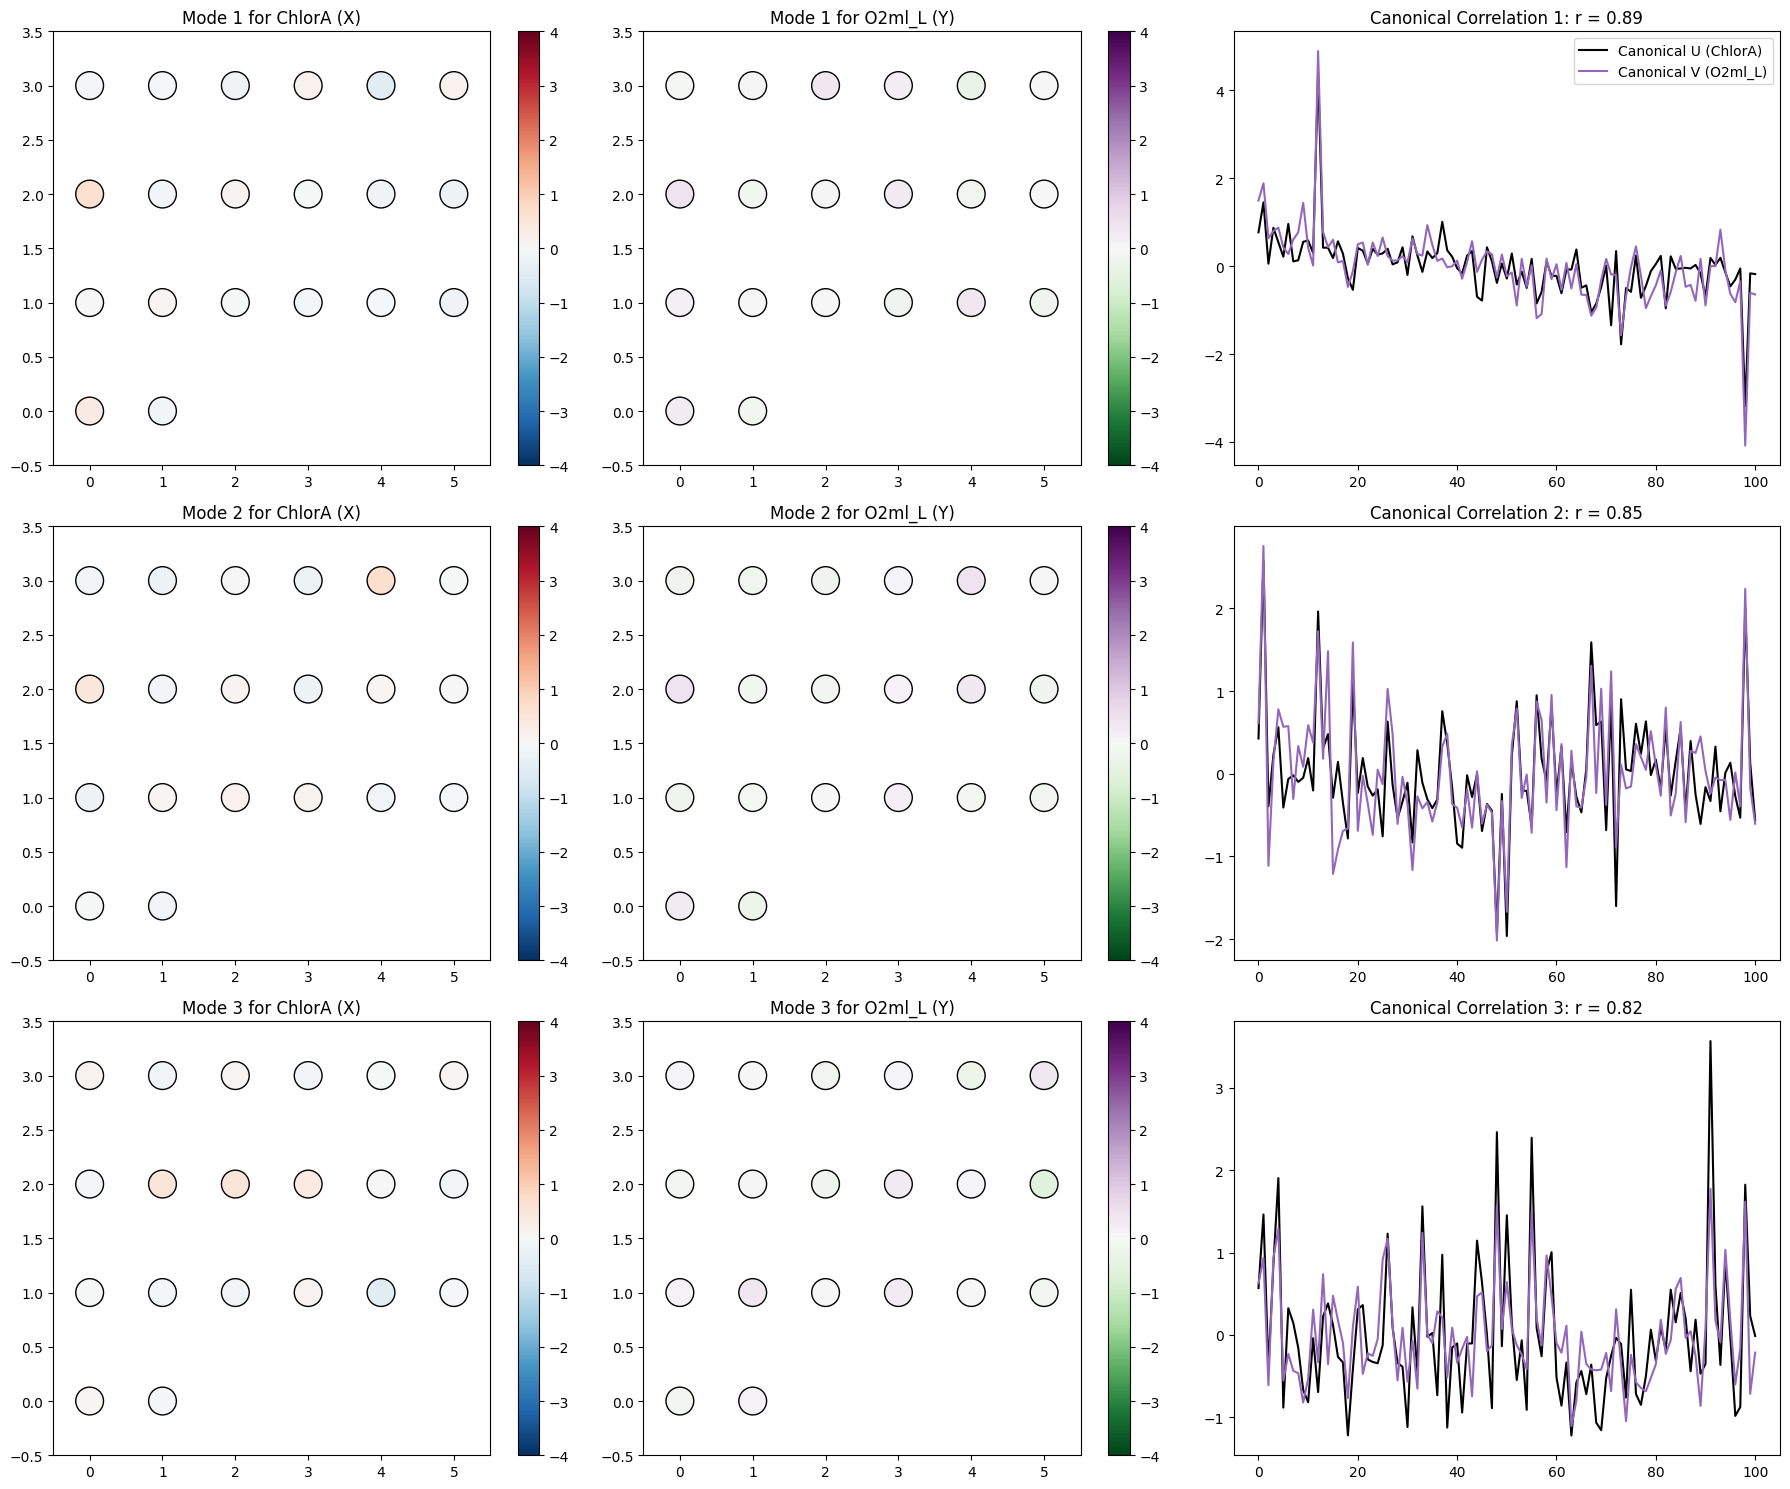

In [283]:
# Align the DataFrames so they have the same index and columns
common_index = cal_data_pivot.index.intersection(nutrient_data_pivot.index)
common_columns = cal_data_pivot.columns.intersection(nutrient_data_pivot.columns)

cal_data_aligned = cal_data_pivot.loc[common_index, common_columns]
nutrient_data_aligned = nutrient_data_pivot.loc[common_index, common_columns]

# Ensure data is aligned and contains no missing values
cal_data_aligned = cal_data_aligned.dropna()
nutrient_data_aligned = nutrient_data_aligned.dropna()

# Standardize the data
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X = scaler_X.fit_transform(cal_data_aligned.values)
Y = scaler_Y.fit_transform(nutrient_data_aligned.values)

# Perform CCA with a suitable number of components
n_components = min(X.shape[1], Y.shape[1])
cca = CCA(n_components=n_components)
U, V = cca.fit_transform(X, Y)

# Prepare to plot up to 6 modes or as many as available
n_modes = min(3, n_components)
fig, ax = plt.subplots(n_modes, 3, figsize=(18, 5 * n_modes))

for i in range(n_modes):
    # Plot X mode vector (A)
    out = ax[i, 0].scatter(
        np.arange(X.shape[1]) % 6,  # Set a 4x6 grid layout for the 22 stations
        3 - np.arange(X.shape[1]) // 6,
        c=cca.x_weights_[:, i],
        s=400,  # Adjust the size of the circles as needed
        cmap="RdBu_r",
        edgecolors="k",
        vmin=-4,
        vmax=4
    )
    ax[i, 0].set_ylim(-0.5, 3.5)
    ax[i, 0].set_xlim(-0.5, 5.5)
    ax[i, 0].set_title(f"Mode {i+1} for ChlorA (X)")
    plt.colorbar(out, ax=ax[i, 0])

    # Plot Y mode vector (B)
    out = ax[i, 1].scatter(
        np.arange(Y.shape[1]) % 6,
        3 - np.arange(Y.shape[1]) // 6,
        c=cca.y_weights_[:, i],
        s=400,  # Adjust the size of the circles as needed
        cmap="PRGn_r",
        edgecolors="k",
        vmin=-4,
        vmax=4
    )
    ax[i, 1].set_ylim(-0.5, 3.5)
    ax[i, 1].set_xlim(-0.5, 5.5)
    ax[i, 1].set_title(f"Mode {i+1} for {nutrient} (Y)")
    plt.colorbar(out, ax=ax[i, 1])

    # Plot U and V (canonical variables)
    ax[i, 2].plot(U[:, i], label="Canonical U (ChlorA)", c="k")
    ax[i, 2].plot(V[:, i], label=f"Canonical V ({nutrient})", c="C4")
    r = np.corrcoef(U[:, i], V[:, i])[0, 1]
    ax[i, 2].set_title(f"Canonical Correlation {i+1}: r = {round(r, 2)}")

    if i == 0:
        ax[i, 2].legend()

plt.tight_layout()
plt.show()

## Overall CCA Results

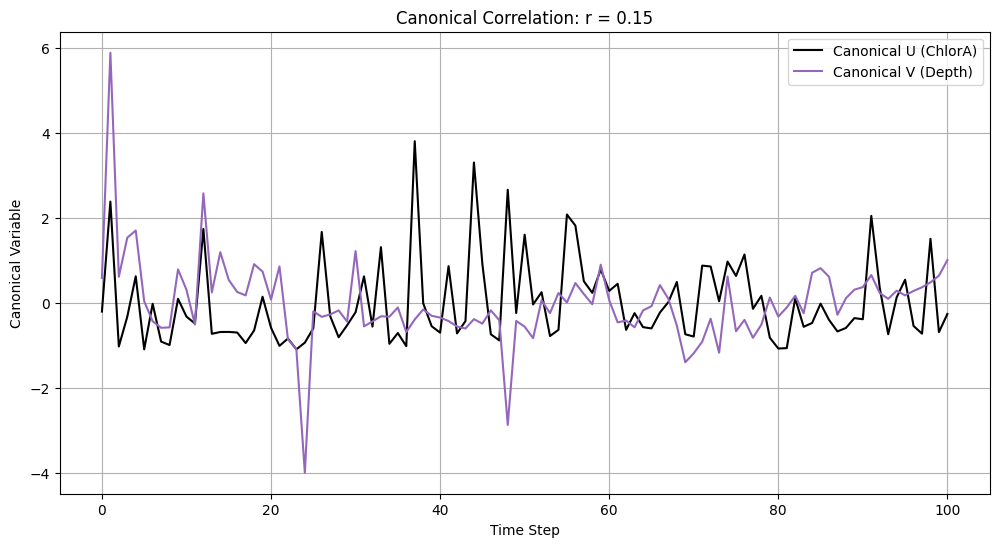

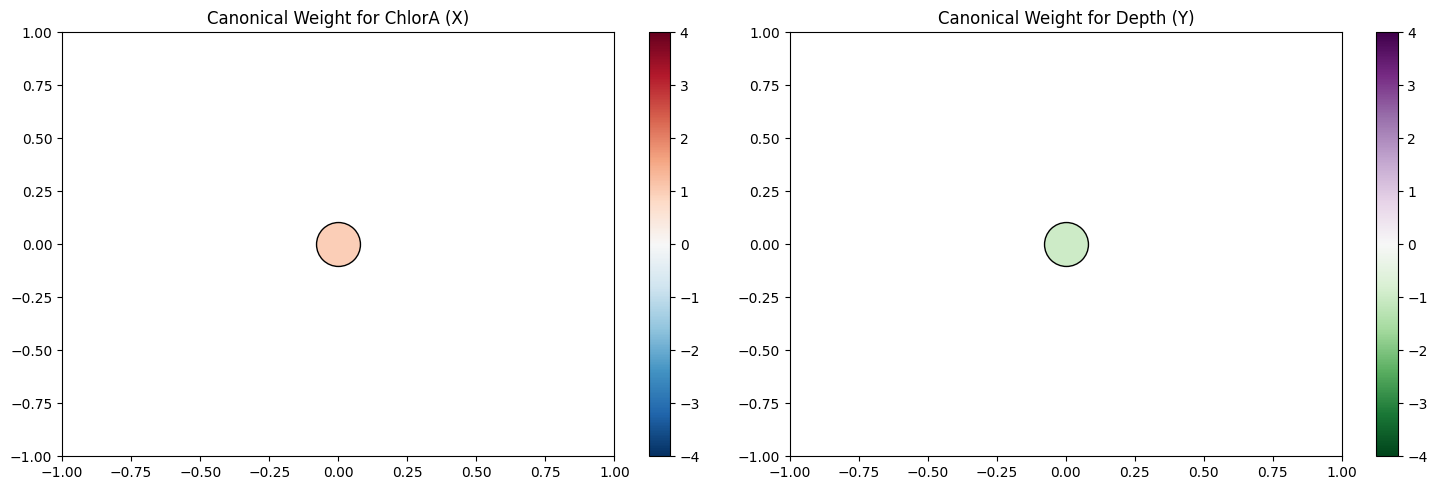

In [ ]:
# Collapse the data by averaging across all stations to create overall time series
cal_data_overall = cal_data_pivot.mean(axis=1)  # Averaging across stations for each time step
depth_data_overall = depth_data_pivot.mean(axis=1)

# Ensure data alignment and drop missing values
combined_data = pd.concat([cal_data_overall, depth_data_overall], axis=1, keys=['ChlorA', 'Depth'])
combined_data = combined_data.dropna()

# Extract values for CCA
X = combined_data['ChlorA'].values.reshape(-1, 1)
Y = combined_data['Depth'].values.reshape(-1, 1)

# Perform CCA
cca = CCA(n_components=1)
U, V = cca.fit_transform(X, Y)

# Plot U and V (canonical variables)
plt.figure(figsize=(12, 6))
plt.plot(U, label="Canonical U (ChlorA)", c="k")
plt.plot(V, label="Canonical V (Depth)", c="C4")
r = np.corrcoef(U[:, 0], V[:, 0])[0, 1]
plt.title(f"Canonical Correlation: r = {round(r, 2)}")
plt.xlabel("Time Step")
plt.ylabel("Canonical Variable")
plt.legend()
plt.grid(True)
plt.show()

# Plot mode vectors as circle plots for the overall effect of the PC on each variable
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot X mode vector (weights)
out = ax[0].scatter(
    [0],  # Single point for overall data
    [0],  # Single point for overall data
    c=cca.x_weights_[:, 0],  # Canonical weights for X (ChlorA)
    s=1000,  # Adjust circle size for better visibility
    cmap="RdBu_r",
    edgecolors="k",
    vmin=-4,
    vmax=4
)
ax[0].set_title("Canonical Weight for ChlorA (X)")
ax[0].set_xlim(-1, 1)
ax[0].set_ylim(-1, 1)
plt.colorbar(out, ax=ax[0])

# Plot Y mode vector (weights)
out = ax[1].scatter(
    [0],  # Single point for overall data
    [0],  # Single point for overall data
    c=cca.y_weights_[:, 0],  # Canonical weights for Y (Depth)
    s=1000,  # Adjust circle size for better visibility
    cmap="PRGn_r",
    edgecolors="k",
    vmin=-4,
    vmax=4
)
ax[1].set_title("Canonical Weight for Depth (Y)")
ax[1].set_xlim(-1, 1)
ax[1].set_ylim(-1, 1)
plt.colorbar(out, ax=ax[1])

plt.tight_layout()
plt.show()

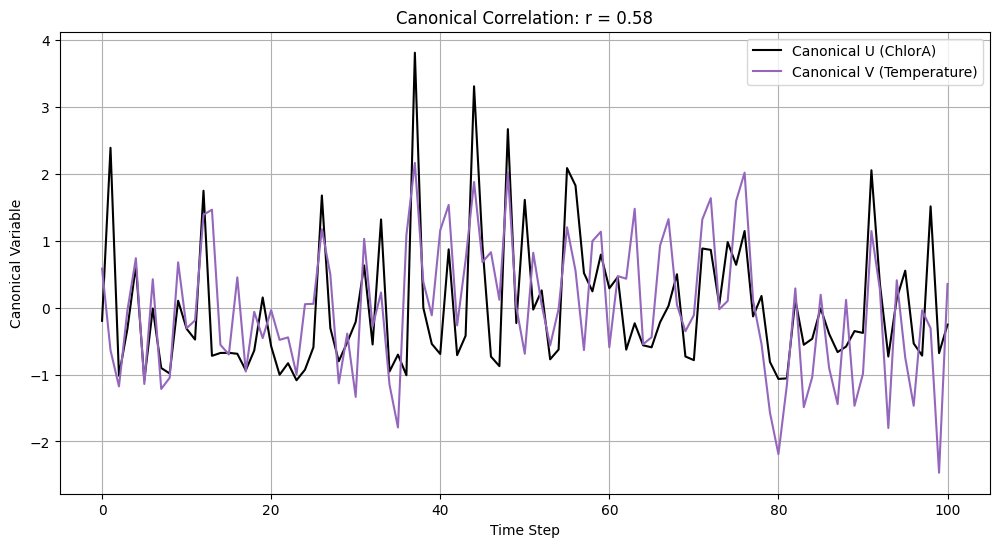

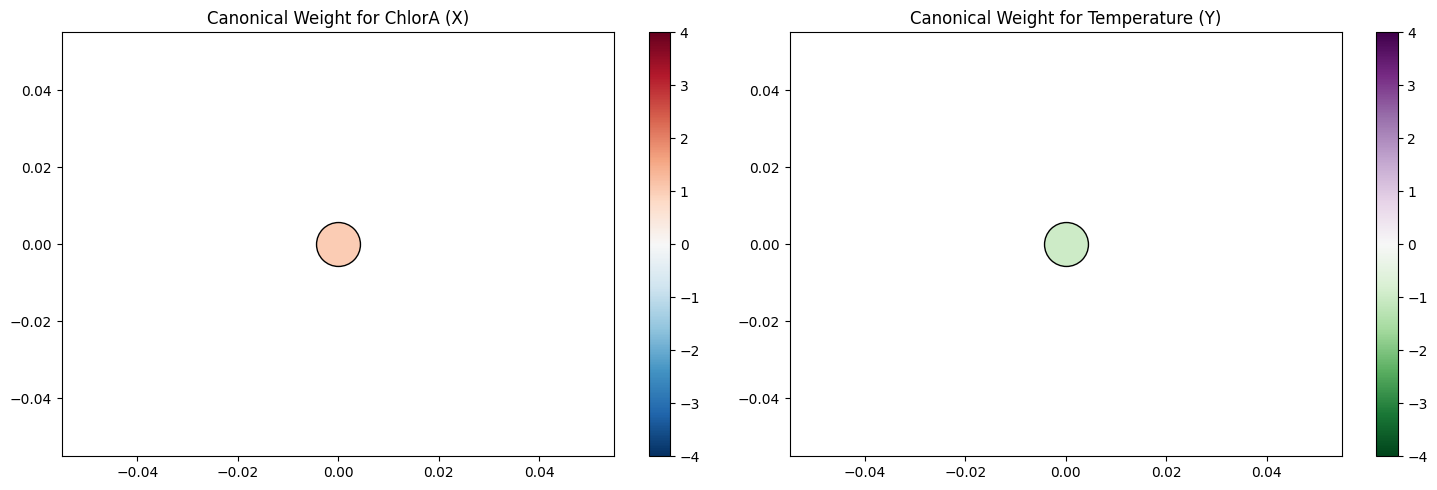

In [ ]:
# Collapse the data by averaging across all stations to create overall time series
cal_data_overall = cal_data_pivot.mean(axis=1)  # Averaging across stations for each time step
temp_data_overall = temp_data_pivot.mean(axis=1)

# Ensure data alignment and drop missing values
combined_data = pd.concat([cal_data_overall, temp_data_overall], axis=1, keys=['ChlorA', 'Temperature'])
combined_data = combined_data.dropna()

# Extract values for CCA
X = combined_data['ChlorA'].values.reshape(-1, 1)
Y = combined_data['Temperature'].values.reshape(-1, 1)

# Perform CCA
cca = CCA(n_components=1)
U, V = cca.fit_transform(X, Y)

# Plot U and V (canonical variables)
plt.figure(figsize=(12, 6))
plt.plot(U, label="Canonical U (ChlorA)", c="k")
plt.plot(V, label="Canonical V (Temperature)", c="C4")
r = np.corrcoef(U[:, 0], V[:, 0])[0, 1]
plt.title(f"Canonical Correlation: r = {round(r, 2)}")
plt.xlabel("Time Step")
plt.ylabel("Canonical Variable")
plt.legend()
plt.grid(True)
plt.show()

# Plot mode vectors as circle plots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot X mode vector (weights)
out = ax[0].scatter(
    [0],  # Single point for overall data
    [0],  # Single point for overall data
    c=cca.x_weights_[:, 0],  # Canonical weights for X (ChlorA)
    s=1000,  # Adjust circle size
    cmap="RdBu_r",
    edgecolors="k",
    vmin=-4,
    vmax=4
)
ax[0].set_title("Canonical Weight for ChlorA (X)")
plt.colorbar(out, ax=ax[0])

# Plot Y mode vector (weights)
out = ax[1].scatter(
    [0],  # Single point for overall data
    [0],  # Single point for overall data
    c=cca.y_weights_[:, 0],  # Canonical weights for Y (Temperature)
    s=1000,  # Adjust circle size
    cmap="PRGn_r",
    edgecolors="k",
    vmin=-4,
    vmax=4
)
ax[1].set_title("Canonical Weight for Temperature (Y)")
plt.colorbar(out, ax=ax[1])

plt.tight_layout()
plt.show()